MatPlotLib

In [ ]:
import matplotlib.pyplot as plt

#Line Plot
Line charts are used to show trends over time (like stock prices, sales growth, etc.)

plt.plot()  -> draws the line.
marker='o   -> shows data points
linestyle='--'  -> marks it dashed
plt.grid(True)  -> adds readability

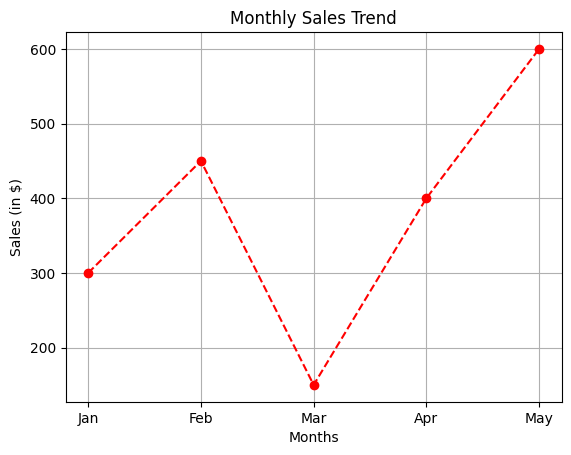

In [ ]:
# Sample data
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
sales = [300, 450, 150, 400, 600]
plt.plot(months, sales, color='red', marker='o', linestyle='--')

# Add labels and title
plt.title("Monthly Sales Trend")
plt.xlabel("Months")
plt.ylabel("Sales (in $)")
plt.grid(True)
plt.show()

#Bar Chart
Best for comparing categories
ex: product-wise or region-wise sales.

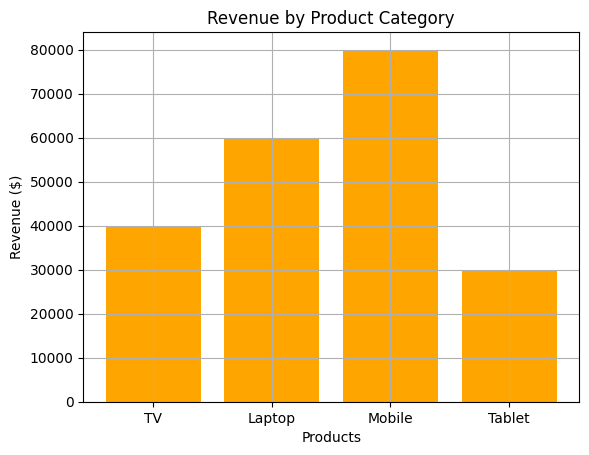

In [ ]:
products = ['TV', 'Laptop', 'Mobile', 'Tablet']
revenue = [40000, 60000, 80000, 30000]
plt.bar(products, revenue, color='orange')
plt.title("Revenue by Product Category")
plt.xlabel("Products")
plt.ylabel("Revenue ($)")
plt.grid(True)
plt.show()

#Scatter Plot
helps us ananlyze relationships betweeen two variables.

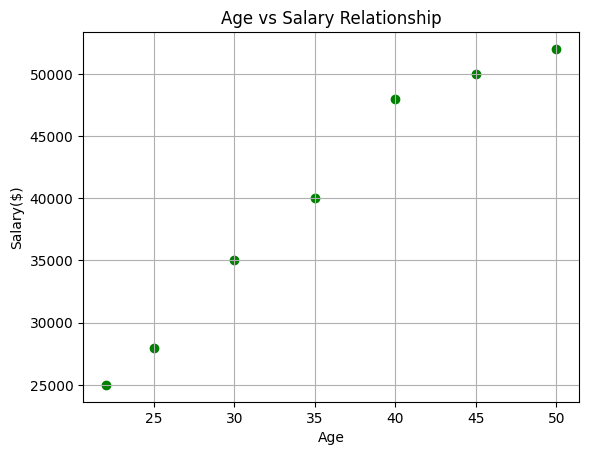

In [ ]:
import numpy as np
age = np.array([22,25,30,35,40,45,50])
sal = np.array([25000, 28000, 35000, 40000, 48000, 50000, 52000])

plt.scatter(age, sal, color='green')
plt.title("Age vs Salary Relationship")
plt.xlabel("Age")
plt.ylabel("Salary($)")
plt.grid(True)
plt.show()

#Pie Chart
show properties of a whole - ex: markett share.

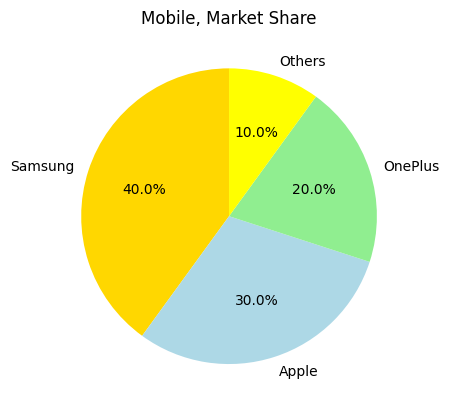

In [ ]:
brands = ['Samsung', 'Apple', 'OnePlus', 'Others']
market_share = [40,30,20,10]
colors = ['gold', 'lightblue', 'lightgreen', 'yellow']
plt.pie(market_share, labels=brands, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Mobile, Market Share")
plt.show()

#Histogram
show frequency distribution - how data is spread acreoss ranges.


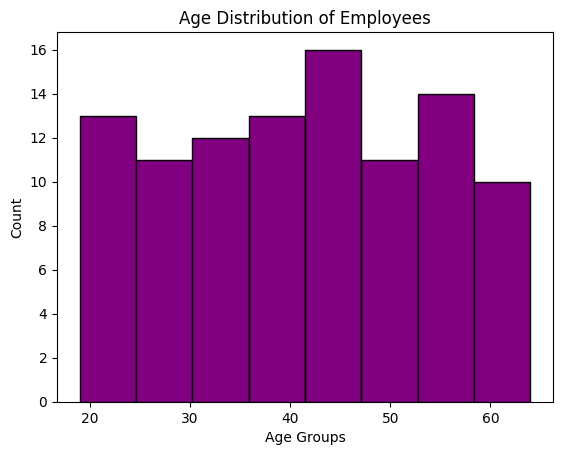

In [ ]:
import numpy as np

# Generate random ages
ages = np.random.randint(18, 65, 100)
plt.hist(ages, bins=8, color='purple', edgecolor='black')
plt.title("Age Distribution of Employees")
plt.xlabel("Age Groups")
plt.ylabel("Count")
plt.show()

# Subplots
Sometimes you want multiple charts in one window - that's what subplots are

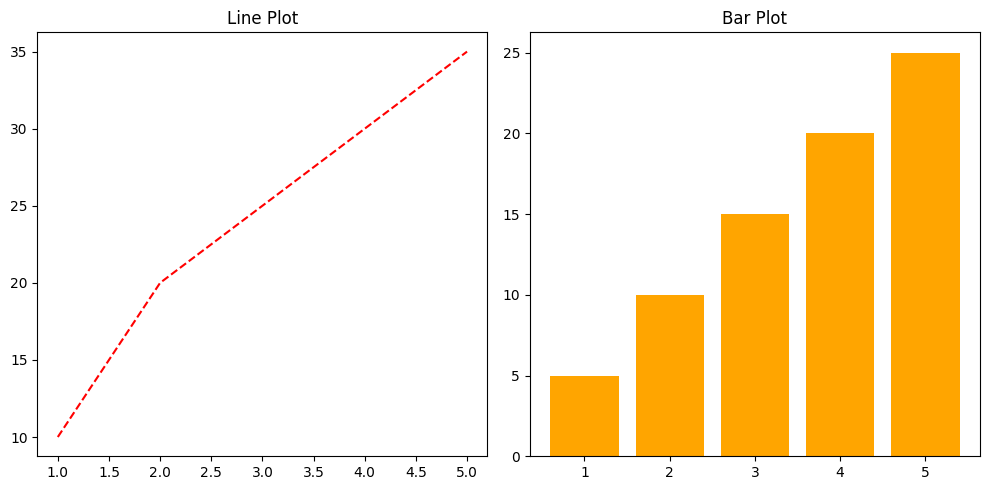

In [ ]:
x = [1,2,3,4,5]
y1 = [10,20,25,30,35]
y2 = [5,10,15,20,25]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)   # 1 row, 2 columns, first column
plt.plot(x, y1, 'r--')
plt.title("Line Plot")
plt.subplot(1,2,2)   # 1 row, 2 columns, second column
plt.bar(x, y2, color='Orange')
plt.title("Bar Plot")
plt.tight_layout()
plt.show()

#Styles, Legends and Save Plot
You can use built-in

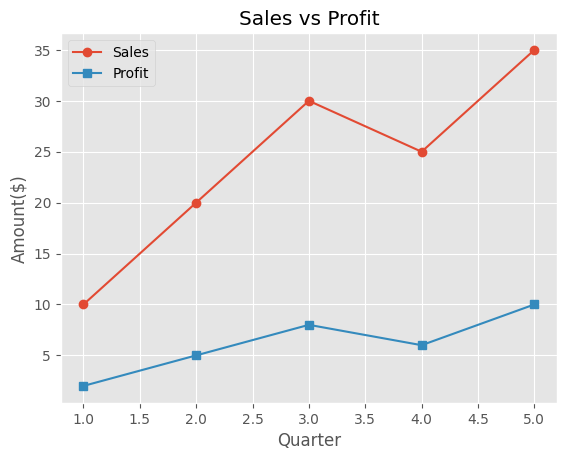

In [ ]:
plt.style.use('ggplot')
x1 = [1,2,3,4,5]
sales = [10,20,30,25,35]
profit= [2,5,8,6,10]
plt.plot(x, sales, label='Sales', marker='o')
plt.plot(x, profit, label='Profit', marker='s')
plt.title("Sales vs Profit")
plt.xlabel("Quarter")
plt.ylabel("Amount($)")
plt.legend()
plt.grid(True)
plt.savefig("sales_profit_chart.png")   # save the plot
plt.show()

#Task 1
Inspect the dataset and list the number of rows, columns, data types, and any missing values.
1. Remove duplicate rows (if any) and re-check the dataset — how many rows were removed?
2. Parse the Date column to datetime, sort the data by date, and report how many rows (if any) have invalid/missing dates.
3. Handle missing values in numeric columns (explain and apply a method you choose), then state which method you used and why.

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

path = '/content/drive/My Drive/data.csv'
df = pd.read_csv(path, encoding='latin-1')
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Duration        Date  Pulse  Maxpulse  Calories
0        60  2020/12/01    110       130     409.1
1        60  2020/12/02    117       145     479.0
2        60  2020/12/03    103       135     340.0
3        45  2020/12/04    109       175     282.4
4        45  2020/12/05    117       148     406.0


In [ ]:
# Remove duplicate rows (if any) and re-check the dataset — how many rows were removed?
orows = df.shape[0]
print("Original Rows", orows)
df.drop_duplicates(inplace=True)
print(df.shape[0])
new_rows = df.shape[0]
print("New Rows ", new_rows)
print("Rows Removed", orows - new_rows)


Original Rows 32
31
New Rows  31
Rows Removed 1


In [ ]:
# Parse the Date column to datetime, sort the data by date, and report how many rows (if any) have invalid/missing dates.
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)

# report how many rows (if any) have invalid/missing dates.
invalid_rows = df[df['Date'].isnull()].shape[0]
print("Invalid Rows", invalid_rows)

Invalid Rows 1


In [ ]:
# Handle missing values in numeric columns (explain and apply a method you choose), then state which method you used and why.
import pandas as pd

df.isnull().sum()
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols].isnull().sum()



# Identify numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Fill missing values with the median of each numeric column
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df[numeric_cols].isnull().sum()



,0
Duration,0
Pulse,0
Maxpulse,0
Calories,0


#Task 3
Create a line plot of Calories over Date (with markers, dashed line, grid, rotated x-ticks) and save the image as line_calories_over_time.png.

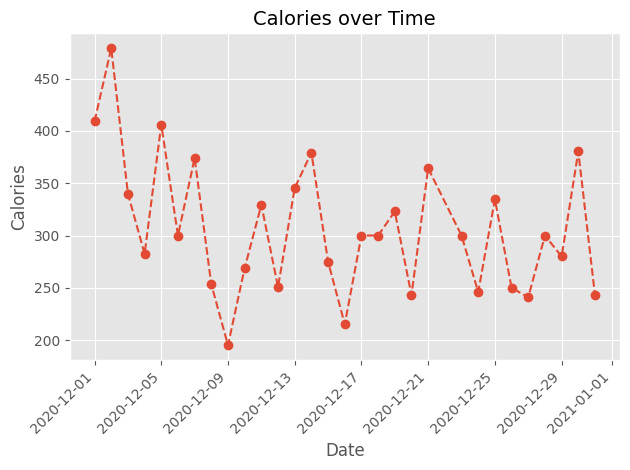

In [ ]:
plt.plot(df['Date'], df['Calories'], marker='o', linestyle='--')

plt.title("Calories over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Calories", fontsize=12)
plt.grid(True)                       # Turn on grid
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()

output_path = '/content/drive/My Drive/line_calories_over_time.png'
plt.savefig(output_path)
plt.show()


Group data by Duration (or sensible duration bins), compute the average Pulse per group, and draw a bar chart comparing average pulse across duration groups; save as bar_avg_pulse_by_duration.png

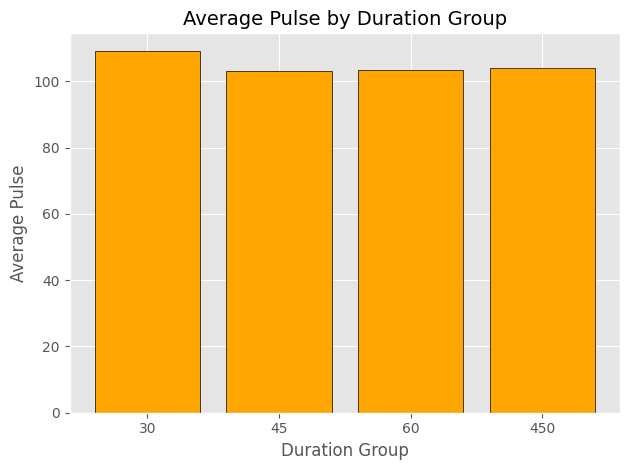

In [ ]:
# --- Compute average Pulse per Duration group ---
avg_pulse = df.groupby('Duration')['Pulse'].mean().reset_index()

# --- Plot bar chart ---
plt.bar(avg_pulse['Duration'].astype(str), avg_pulse['Pulse'], color='orange', edgecolor='black')

plt.title("Average Pulse by Duration Group", fontsize=14)
plt.xlabel("Duration Group")
plt.ylabel("Average Pulse")
plt.grid(True)
plt.tight_layout()

output_path = '/content/drive/My Drive/bar_avg_pulse_by_duration.png'
plt.savefig(output_path)
plt.show()


Plot a scatter plot of Duration vs Calories, compute the Pearson correlation coefficient, and add a linear trend line to the scatter; save as scatter_duration_vs_calories.png

Pearson correlation coefficient: -0.12


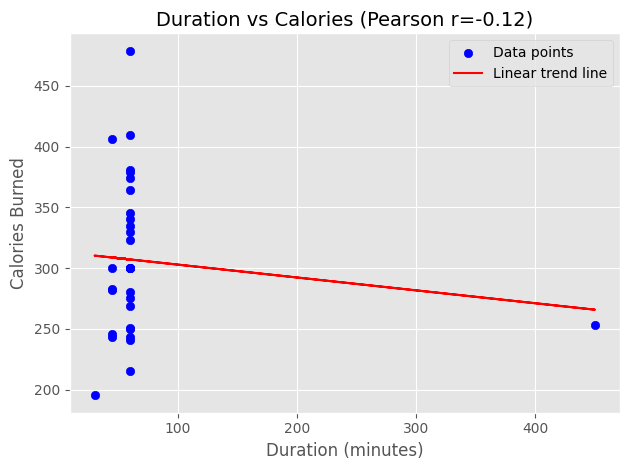

In [ ]:
# Extract x and y
x3 = df['Duration'].values
y3 = df['Calories'].values

# Compute Pearson correlation coefficient
corr = np.corrcoef(x3, y3)[0, 1]
print(f"Pearson correlation coefficient: {corr:.2f}")

# Compute linear trend line (y = mx + b)
m, b = np.polyfit(x3, y3, 1)  # degree 1 for linear fit
y_fit = m * x3 + b

# Plot scatter
plt.scatter(x3, y3, color='blue', marker='o', label='Data points')
plt.plot(x3, y_fit, color='red', label=f'Linear trend line')
plt.title(f'Duration vs Calories (Pearson r={corr:.2f})', fontsize=14)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save plot
plt.savefig('/content/drive/My Drive/scatter_duration_vs_calories.png', dpi=300)
plt.show()

Create a pie chart showing the percentage breakdown of Maxpulse into ranges (e.g., <=120, 121–140, 141–160, >160) and save as pie_maxpulse_ranges.png.

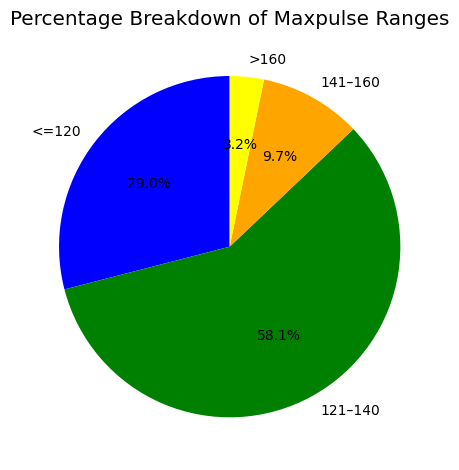

In [ ]:
bins = [0, 120, 140, 160, df['Maxpulse'].max()+1]
labels = ['<=120', '121–140', '141–160', '>160']

# Categorize Maxpulse into ranges
df['MaxpulseRange'] = pd.cut(df['Maxpulse'], bins=bins, labels=labels, include_lowest=True)

# Count number of occurrences per range
range_counts = df['MaxpulseRange'].value_counts().sort_index()

plt.pie(range_counts, labels=range_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue','green','orange', 'yellow'])
plt.title('Percentage Breakdown of Maxpulse Ranges')
plt.tight_layout()

plt.savefig('/content/drive/My Drive/pie_maxpulse_ranges.png')
plt.show()


Plot a histogram of Calories with an appropriate number of bins, comment on shape/skewness, and save as hist_calories.png.

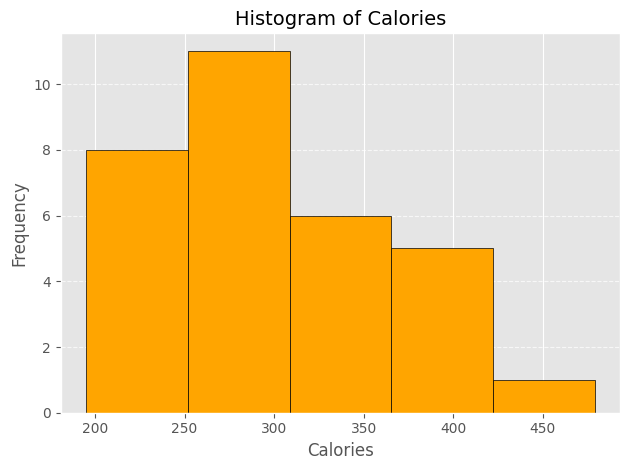

Mean Calories: 306.12, Median Calories: 300.00
The distribution is positively skewed (right-skewed).


In [ ]:
# Decide number of bins using Freedman-Diaconis rule or sqrt rule
import numpy as np
data = df['Calories'].values
n_bins = int(np.sqrt(len(data)))  # simple choice: sqrt of number of data points

plt.hist(data, bins=n_bins, color='orange', edgecolor='black')
plt.title('Histogram of Calories', fontsize=14)
plt.xlabel('Calories', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('/content/drive/My Drive/hist_calories.png', dpi=300)
plt.show()

# Comment on shape/skewness
mean = data.mean()
median = np.median(data)
if mean > median:
    skewness = "positively skewed (right-skewed)"
elif mean < median:
    skewness = "negatively skewed (left-skewed)"
else:
    skewness = "approximately symmetric"

print(f"Mean Calories: {mean:.2f}, Median Calories: {median:.2f}")
print(f"The distribution is {skewness}.")


Build a multi-panel subplot figure (1 row × 2 columns): left = line plot of Pulse over Date, right = scatter of Duration vs Maxpulse; save as subplots_pulse_duration_maxpulse.png

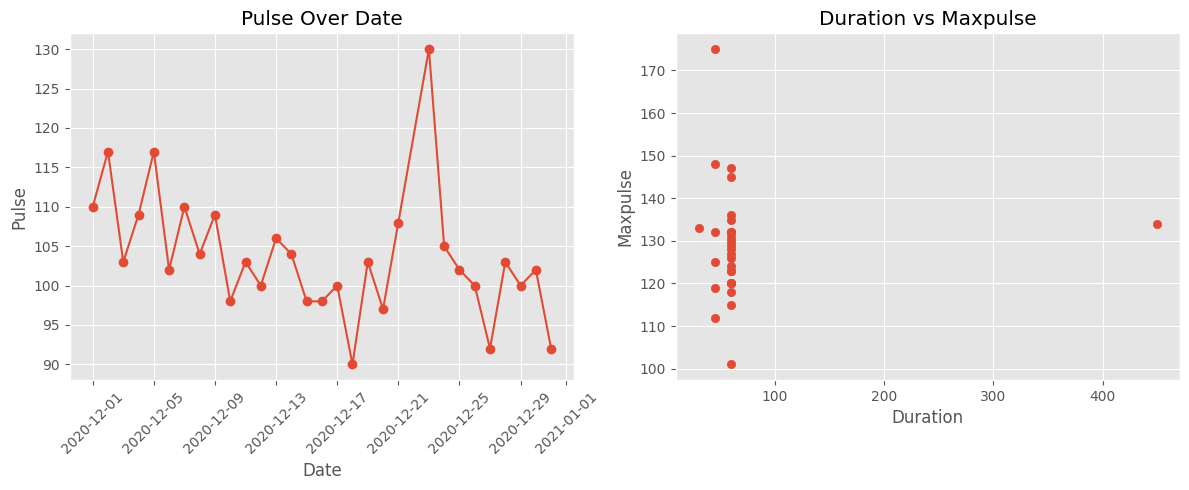

In [ ]:
# Build a multi-panel subplot figure (1 row × 2 columns): left = line plot of Pulse over Date, right = scatter of Duration vs Maxpulse; save as subplots_pulse_duration_maxpulse.png.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left subplot: line plot of Pulse over Date
axes[0].plot(df['Date'], df['Pulse'], marker='o', linestyle='-')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Pulse')
axes[0].set_title('Pulse Over Date')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Right subplot: scatter of Duration vs Maxpulse
axes[1].scatter(df['Duration'], df['Maxpulse'])
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Maxpulse')
axes[1].set_title('Duration vs Maxpulse')
axes[1].grid(True)

plt.tight_layout()
# plt.savefig('subplots_pulse_duration_maxpulse.png')
plt.show()

#Task 3
1. Basic Data Understanding

What does the dataset look like?

What are the column names, data types, and basic statistics?

Are there missing values or anomalies?

((No plot required — just inspection using Pandas.)



 2. Trend Analysis

How does a numerical variable (e.g., Sales) change over time or index?

Are there visible upward or downward trends?

Are there any noticeable spikes, dips, or seasonality?

lineplot



 3. Category Comparison

Which category (e.g., Region, Product, Department) contributes most to the total value?

Which categories have lower contributions?

How big is the gap between categories?

barplot



 4. Value Distribution

How are values in a numerical column distributed?

Are they concentrated around certain ranges or spread out evenly?

Are there extreme values?

histplot



 5. Relationship Between Variables

How does one numerical variable relate to another (e.g., Sales vs Profit)?

Is there any visible correlation?

Are there outliers?

scatterplot



 6. Outliers & Spread

How spread out are values in a numerical column?

Are there any outliers?

How does this spread differ across categories?

boxplot



 7. Proportions

How is the dataset divided among different categories?

Which category has the largest share?

Is the distribution balanced or skewed?

pieplot

 8. Multiple Visuals in One View

How do multiple insights look side by side?

Can we spot patterns when trend, distribution, and relationships are combined visually?

Which plot gives the clearest story?

subplots





 9. Final Task Submission

Your final notebook/script must include:

All questions answered with appropriate Matplotlib  plots.

Proper customization (titles, labels, legends, grids).

A short written note (markdown ) under each plot describing what the plot reveals.

All code should be your own — no Seaborn or external visualization libraries

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')
import pandas as pd

path = '/content/drive/My Drive/tips.csv'
df1 = pd.read_csv(path, encoding='latin-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Basic Data Understanding

In [ ]:
# What does the dataset look like?
print(df1.head())
print(df1.tail())
print(df1.info())

   total_bill   tip     sex smoker  day    time  size  price_per_person  \
0       16.99  1.01  Female     No  Sun  Dinner     2              8.49   
1       10.34  1.66    Male     No  Sun  Dinner     3              3.45   
2       21.01  3.50    Male     No  Sun  Dinner     3              7.00   
3       23.68  3.31    Male     No  Sun  Dinner     2             11.84   
4       24.59  3.61  Female     No  Sun  Dinner     4              6.15   

           Payer Name         CC Number Payment ID  
0  Christy Cunningham  3560325168603410    Sun2959  
1      Douglas Tucker  4478071379779230    Sun4608  
2      Travis Walters  6011812112971322    Sun4458  
3    Nathaniel Harris  4676137647685994    Sun5260  
4        Tonya Carter  4832732618637221    Sun2251  
     total_bill   tip     sex smoker   day    time  size  price_per_person  \
239       29.03  5.92    Male     No   Sat  Dinner     3              9.68   
240       27.18  2.00  Female    Yes   Sat  Dinner     2             13.59 

In [ ]:
# What are the column names, data types, and basic statistics?
print(df1.columns)
print(df1.dtypes)
print(df1.describe())

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'price_per_person', 'Payer Name', 'CC Number', 'Payment ID'],
      dtype='object')
total_bill          float64
tip                 float64
sex                  object
smoker               object
day                  object
time                 object
size                  int64
price_per_person    float64
Payer Name           object
CC Number             int64
Payment ID           object
dtype: object
       total_bill         tip        size  price_per_person     CC Number
count  244.000000  244.000000  244.000000        244.000000  2.440000e+02
mean    19.785943    2.998279    2.569672          7.888197  2.563496e+15
std      8.902412    1.383638    0.951100          2.914234  2.369340e+15
min      3.070000    1.000000    1.000000          2.880000  6.040679e+10
25%     13.347500    2.000000    2.000000          5.800000  3.040731e+13
50%     17.795000    2.900000    2.000000          7.255000  3.525318e+15
7

In [ ]:
# Are there missing values or anomalies?
print(df1.isnull().sum())

total_bill          0
tip                 0
sex                 0
smoker              0
day                 0
time                0
size                0
price_per_person    0
Payer Name          0
CC Number           0
Payment ID          0
dtype: int64


2. Trend Analysis

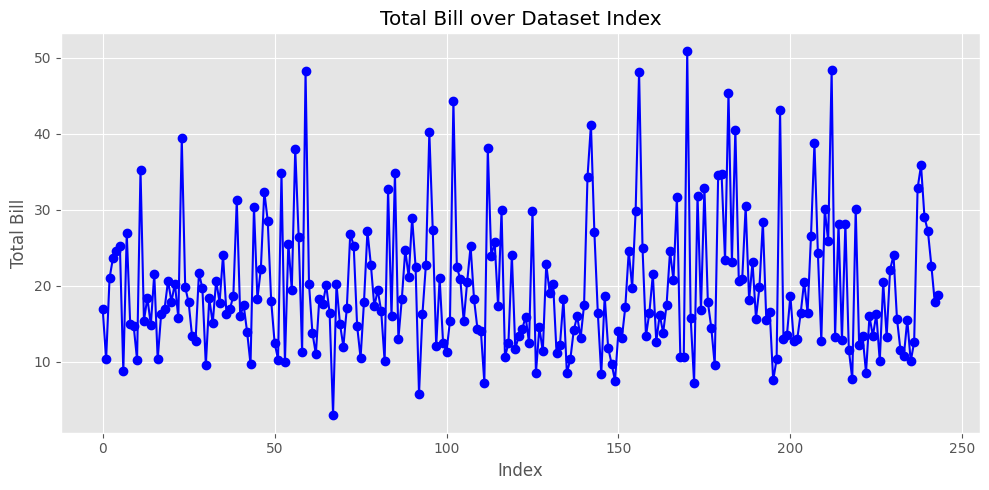

In [ ]:
# How does a numerical variable (e.g., Sales) change over time or index?

# Drop rows with missing total_bill
df1 = df1.dropna(subset=['total_bill'])

# Plot total_bill over dataset index
plt.figure(figsize=(10,5))
plt.plot(df1.index, df1['total_bill'], marker='o', linestyle='-', color='blue')
plt.title('Total Bill over Dataset Index')
plt.xlabel('Index')
plt.ylabel('Total Bill')
plt.grid(True)
plt.tight_layout()
plt.show()

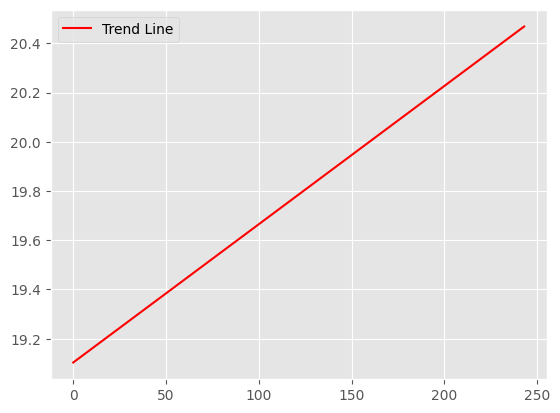

In [ ]:
# Are there visible upward or downward trends?

# Fit linear trend line
m, b = np.polyfit(df1.index, df1['total_bill'], 1)
plt.plot(df1.index, m*df1.index + b, color='red', label='Trend Line')
plt.legend()
plt.show()

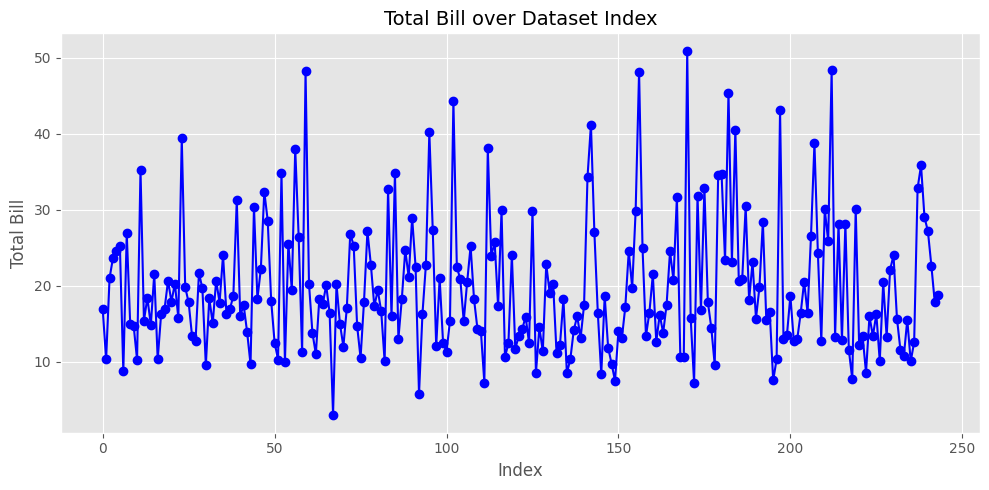

In [ ]:
# Are there any noticeable spikes, dips, or seasonality?

# Plot total_bill over index
plt.figure(figsize=(10,5))
plt.plot(df1.index, df1['total_bill'], marker='o', linestyle='-', color='blue')
plt.title('Total Bill over Dataset Index', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Total Bill', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

 3. Category Comparison

In [ ]:
# Which category (e.g., Region, Product, Department) contributes most to the total value?

# Group by 'day' and sum 'total_bill'
total_per_day = df1.groupby('day')['total_bill'].sum()

# Find the day that contributes the most
top_day = total_per_day.idxmax()
top_value = total_per_day.max()

print(f"Day that contributes the most to total bill: {top_day}")
print(f"Total bill on {top_day}: ${top_value:.2f}")

Day that contributes the most to total bill: Sat
Total bill on Sat: $1778.40


In [ ]:
# Which categories have lower contributions?
least_day = total_per_day.idxmin()
least_value = total_per_day.min()

print(f"Day that contributes the least to total bill: {least_day}")
print(f"Total bill on {least_day}: ${least_value:.2f}")

Day that contributes the least to total bill: Fri
Total bill on Fri: $325.88


In [ ]:
# How big is the gap between categories?
gap = top_value - least_value
print(f"The gap between the top day and the least day is ${gap:.2f}")

The gap between the top day and the least day is $1452.52




 4. Value Distribution

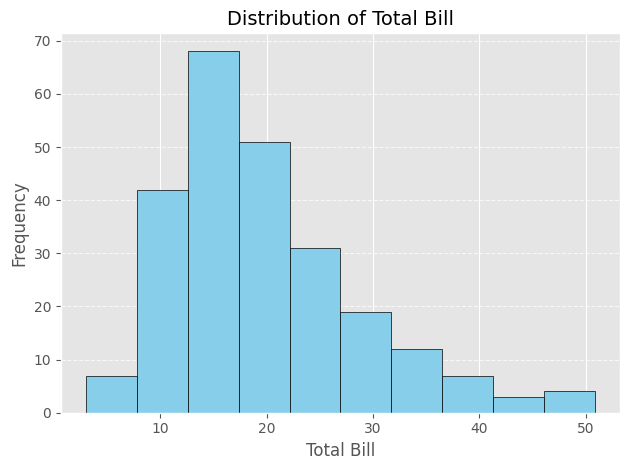

Summary statistics for Total Bill:
count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64


In [ ]:
# How are values in a numerical column distributed?

plt.hist(df1['total_bill'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Bill', fontsize=14)
plt.xlabel('Total Bill', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Summary statistics ---
print("Summary statistics for Total Bill:")
print(df1['total_bill'].describe())

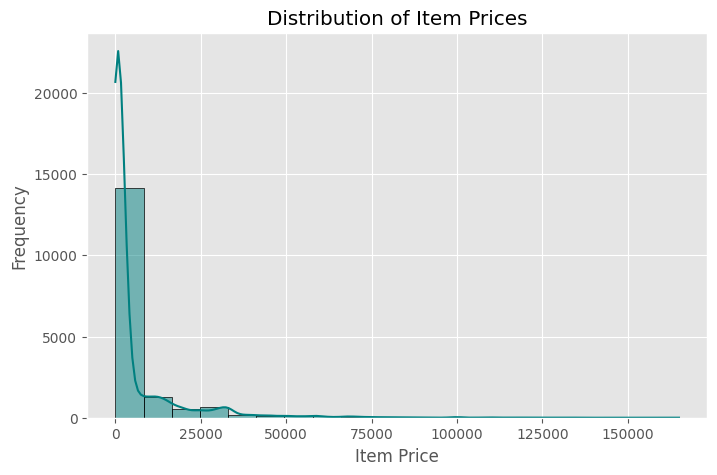

In [ ]:
# Are they concentrated around certain ranges or spread out evenly?
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(dp['Item_price'], bins=20, kde=True, color='teal', edgecolor='black')
plt.title('Distribution of Item Prices')
plt.xlabel('Item Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Are there extreme values?
Q1 = df1['total_bill'].quantile(0.25)
Q3 = df1['total_bill'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df1[(df1['total_bill'] < lower_bound) | (df1['total_bill'] > upper_bound)]
print("Outliers:")
print(outliers)

Outliers:
     total_bill    tip     sex smoker   day    time  size  price_per_person  \
59        48.27   6.73    Male     No   Sat  Dinner     4             12.07   
102       44.30   2.50  Female    Yes   Sat  Dinner     3             14.77   
142       41.19   5.00    Male     No  Thur   Lunch     5              8.24   
156       48.17   5.00    Male     No   Sun  Dinner     6              8.03   
170       50.81  10.00    Male    Yes   Sat  Dinner     3             16.94   
182       45.35   3.50    Male    Yes   Sun  Dinner     3             15.12   
184       40.55   3.00    Male    Yes   Sun  Dinner     2             20.27   
197       43.11   5.00  Female    Yes  Thur   Lunch     4             10.78   
212       48.33   9.00    Male     No   Sat  Dinner     4             12.08   

          Payer Name         CC Number Payment ID  
59       Brian Ortiz  6596453823950595    Sat8139  
102    Heather Cohen   379771118886604    Sat6240  
142     Eric Andrews  4356531761046453   Th



 5. Relationship Between Variables

Summary statistics for 'total_bill':
count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64


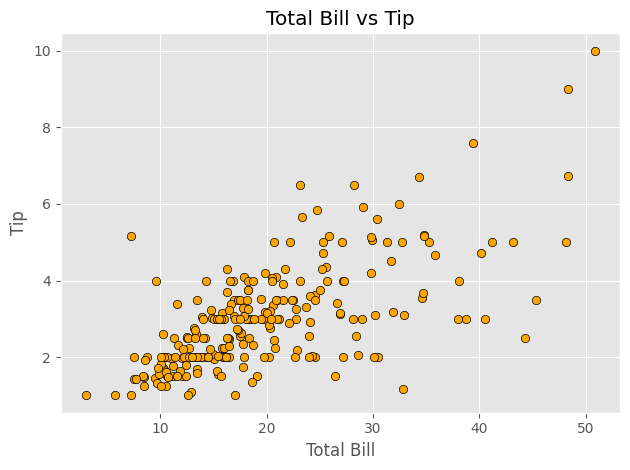

In [ ]:
# How does one numerical variable relate to another (e.g., Sales vs Profit)?

# 1. Descriptive statistics
print("Summary statistics for 'total_bill':")
print(df1['total_bill'].describe())

plt.scatter(df1['total_bill'], df1['tip'], color='orange', edgecolor='black')
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Is there any visible correlation?
corr_matrix = df1[['total_bill', 'tip']].corr()
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
            total_bill       tip
total_bill    1.000000  0.675734
tip           0.675734  1.000000


In [ ]:
# Are there outliers?
Q1 = df1['total_bill'].quantile(0.25)
Q3 = df1['total_bill'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df1[(df1['total_bill'] < lower_bound) | (df1['total_bill'] > upper_bound)]
print("Outliers:")
print(outliers)

Outliers:
     total_bill    tip     sex smoker   day    time  size  price_per_person  \
59        48.27   6.73    Male     No   Sat  Dinner     4             12.07   
102       44.30   2.50  Female    Yes   Sat  Dinner     3             14.77   
142       41.19   5.00    Male     No  Thur   Lunch     5              8.24   
156       48.17   5.00    Male     No   Sun  Dinner     6              8.03   
170       50.81  10.00    Male    Yes   Sat  Dinner     3             16.94   
182       45.35   3.50    Male    Yes   Sun  Dinner     3             15.12   
184       40.55   3.00    Male    Yes   Sun  Dinner     2             20.27   
197       43.11   5.00  Female    Yes  Thur   Lunch     4             10.78   
212       48.33   9.00    Male     No   Sat  Dinner     4             12.08   

          Payer Name         CC Number Payment ID  
59       Brian Ortiz  6596453823950595    Sat8139  
102    Heather Cohen   379771118886604    Sat6240  
142     Eric Andrews  4356531761046453   Th

 6. Outliers & Spread

In [ ]:
# How spread out are values in a numerical column?

# Descriptive statistics
print("Summary statistics for 'total_bill':")
print(df1['total_bill'].describe())

Summary statistics for 'total_bill':
count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64


In [ ]:
# How does this spread differ across categories?

# 1️. Grouped descriptive statistics
group_stats = df1.groupby('day')['total_bill'].describe()
print("Total Bill distribution across days:")
print(group_stats)


Total Bill distribution across days:
      count       mean       std   min      25%    50%      75%    max
day                                                                   
Fri    19.0  17.151579  8.302660  5.75  12.0950  15.38  21.7500  40.17
Sat    87.0  20.441379  9.480419  3.07  13.9050  18.24  24.7400  50.81
Sun    76.0  21.410000  8.832122  7.25  14.9875  19.63  25.5975  48.17
Thur   62.0  17.682742  7.886170  7.51  12.4425  16.20  20.1550  43.11


 7. Proportions

Dataset division among days:
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


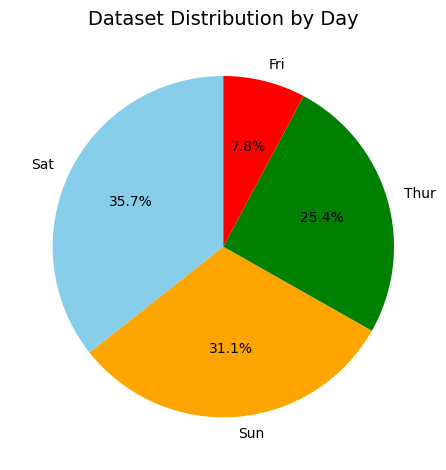

In [ ]:
# How is the dataset divided among different categories?

# Count of rows per category
category_counts = df1['day'].value_counts()
print("Dataset division among days:")
print(category_counts)

# Optional: Plot as a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue','orange','green','red'])
plt.title('Dataset Distribution by Day', fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
# Which category has the largest share?

# Count rows per category
category_counts = df1['day'].value_counts()

# Find the category with the largest share
largest_category = category_counts.idxmax()
largest_count = category_counts.max()

print(f"Category with the largest share: {largest_category} ({largest_count} rows)")


Category with the largest share: Sat (87 rows)


count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64


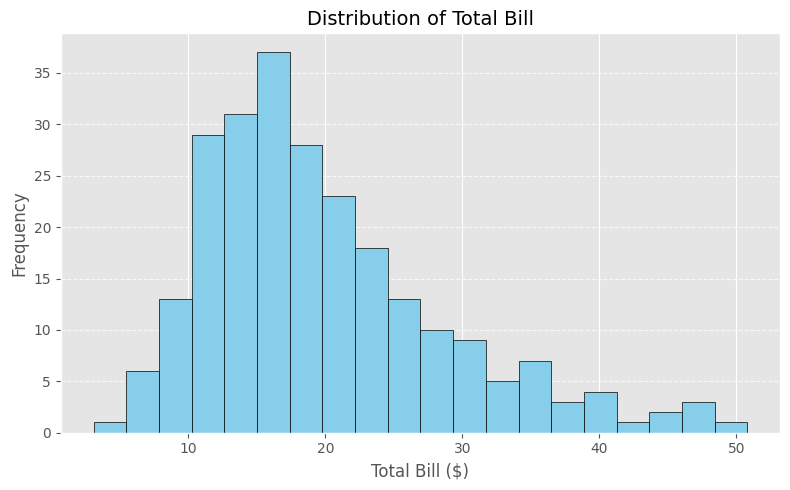

In [ ]:
# Is the distribution balanced or skewed?

# Summary statistics
print(df1['total_bill'].describe())

# Histogram
plt.figure(figsize=(8,5))
plt.hist(df1['total_bill'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Bill', fontsize=14)
plt.xlabel('Total Bill ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


 8. Multiple Visuals in One View

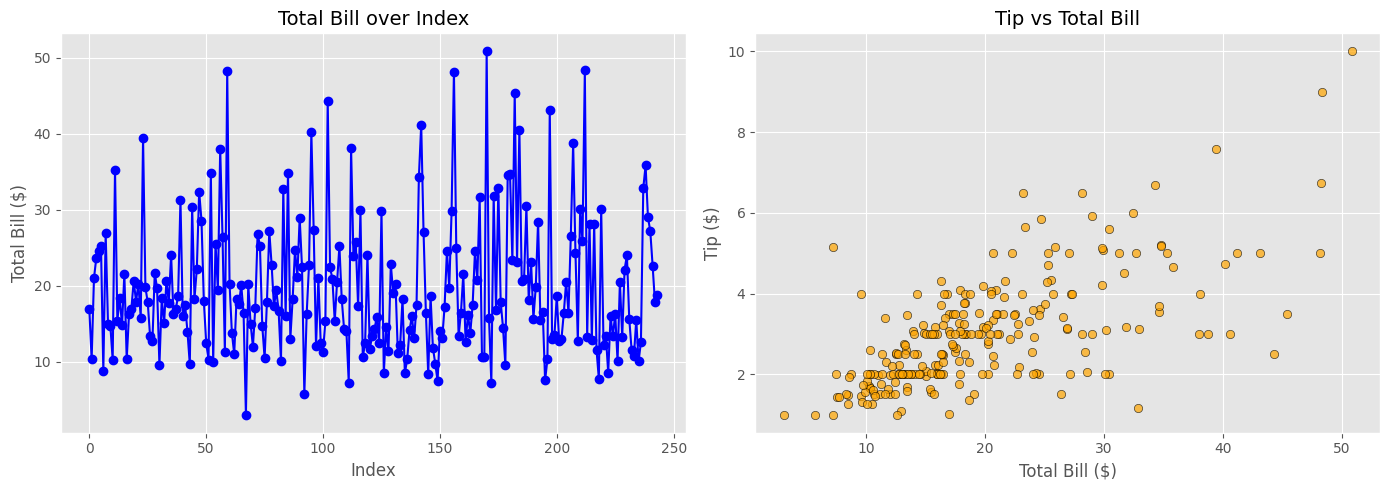

In [ ]:
# How do multiple insights look side by side?

# Create 1 row × 2 columns subplot
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Left: line plot of total_bill over index
axes[0].plot(df1.index, df1['total_bill'], marker='o', linestyle='-', color='blue')
axes[0].set_title('Total Bill over Index', fontsize=14)
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Total Bill ($)')
axes[0].grid(True)

# Right: scatter plot of total_bill vs tip
axes[1].scatter(df1['total_bill'], df1['tip'], color='orange', edgecolor='black', alpha=0.7)
axes[1].set_title('Tip vs Total Bill', fontsize=14)
axes[1].set_xlabel('Total Bill ($)')
axes[1].set_ylabel('Tip ($)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

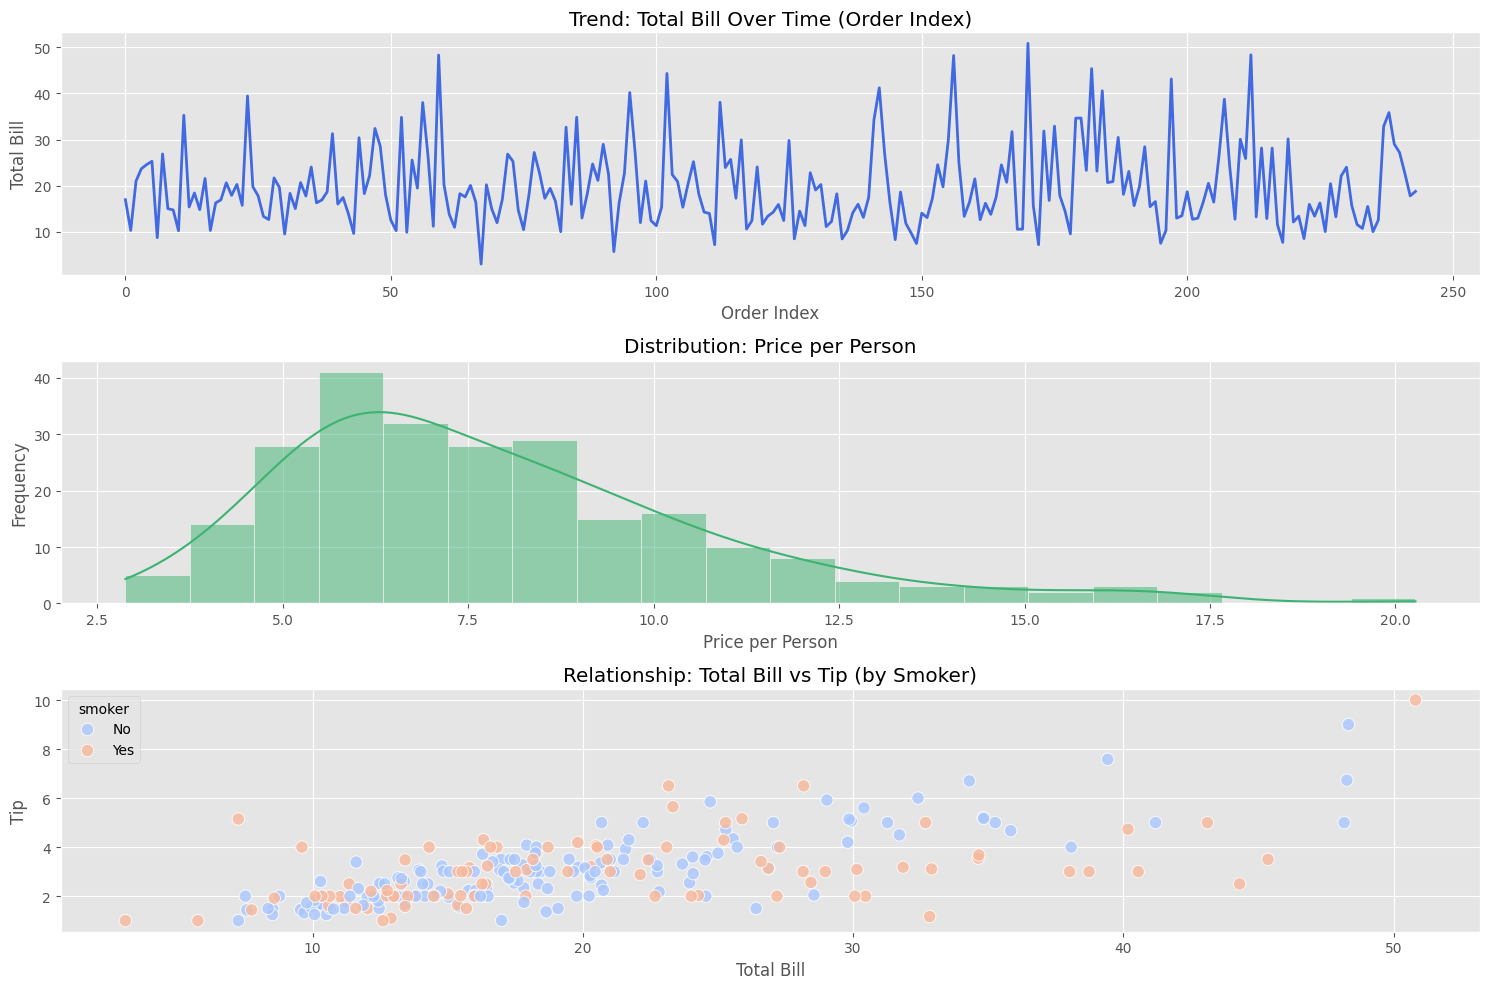

In [ ]:
# Can we spot patterns when trend, distribution, and relationships are combined visually?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is loaded into df
# Columns: total_bill, tip, sex, smoker, day, time, size, price_per_person, Payer Name, CC Number, Payment ID

# Create figure and subplots
plt.figure(figsize=(15, 10))

# --- 1️ Trend: How total bills vary across records ---
plt.subplot(3, 1, 1)
sns.lineplot(x=df1.index, y='total_bill', data=df1, color='royalblue', linewidth=2)
plt.title('Trend: Total Bill Over Time (Order Index)')
plt.xlabel('Order Index')
plt.ylabel('Total Bill')

# --- 2️ Distribution: Spread of Price per Person ---
plt.subplot(3, 1, 2)
sns.histplot(df1['price_per_person'], bins=20, kde=True, color='mediumseagreen')
plt.title('Distribution: Price per Person')
plt.xlabel('Price per Person')
plt.ylabel('Frequency')

# --- 3️ Relationship: Total Bill vs Tip, colored by Smoker ---
plt.subplot(3, 1, 3)
sns.scatterplot(x='total_bill', y='tip', hue='smoker', data=df1, palette='coolwarm', s=80, alpha=0.8)
plt.title('Relationship: Total Bill vs Tip (by Smoker)')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

# Adjust layout for clarity
plt.tight_layout()
plt.show()

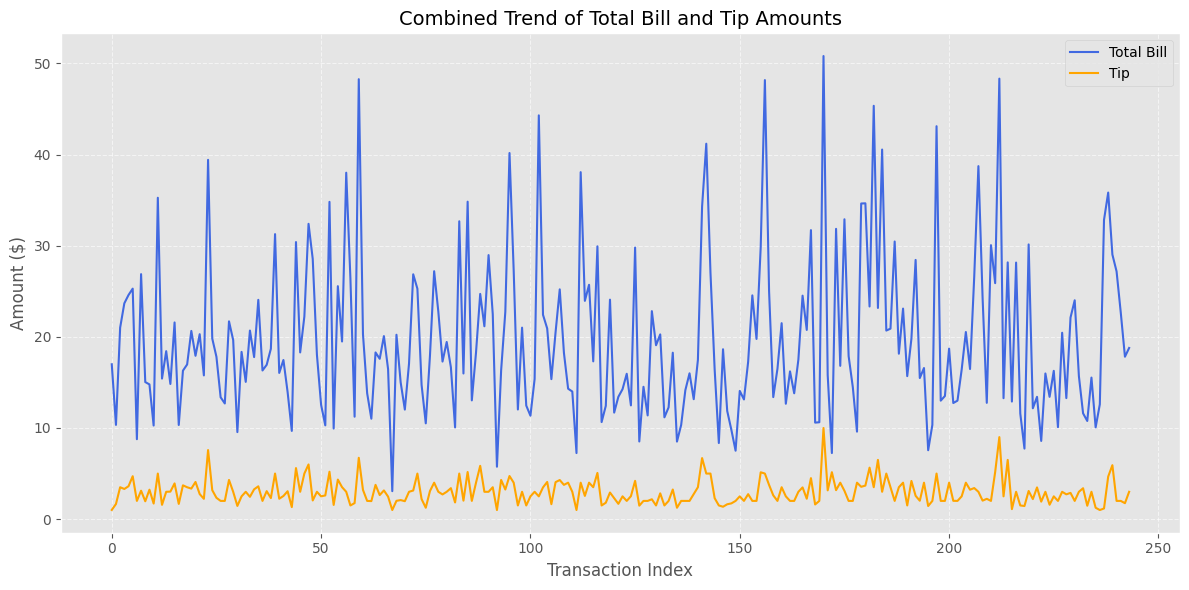

In [ ]:
# Which plot gives the clearest story?

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Combine trend, distribution, and relationship in one visual
sns.lineplot(x=range(len(df1)), y='total_bill', data=df1, label='Total Bill', color='royalblue')
sns.lineplot(x=range(len(df1)), y='tip', data=df1, label='Tip', color='orange')

plt.title('Combined Trend of Total Bill and Tip Amounts', fontsize=14)
plt.xlabel('Transaction Index')
plt.ylabel('Amount ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()



# Seaborn

Categorical Plots (Why: compare groups/categories)

- **Barplot** (`sns.barplot`): shows aggregate (mean) for categories.
- **Countplot** (`sns.countplot`): shows counts of categorical values.
- **Boxplot** (`sns.boxplot`): shows median, quartiles, and outliers.
- **Violinplot** (`sns.violinplot`): boxplot + KDE.

Use `hue` to split by another categorical variable.

In [ ]:
# Install seaborn if needed
#pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style='whitegrid')

# Load example datasets
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

print('Datasets loaded: tips (rows={}), iris (rows={})'.format(len(tips), len(iris)))

tips.head()


Datasets loaded: tips (rows=244), iris (rows=150)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


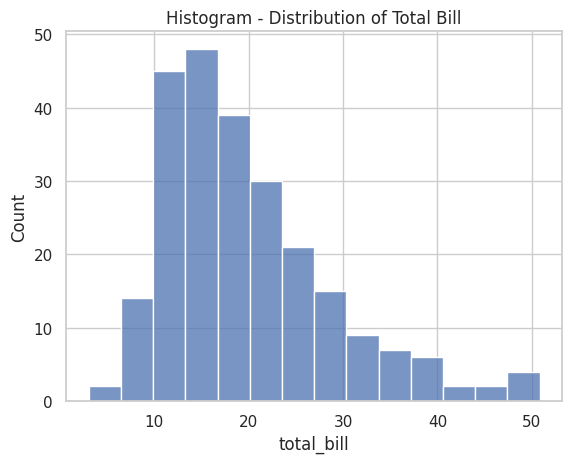

In [ ]:
sns.histplot(tips['total_bill'], kde=False)
plt.title('Histogram - Distribution of Total Bill')
plt.show()

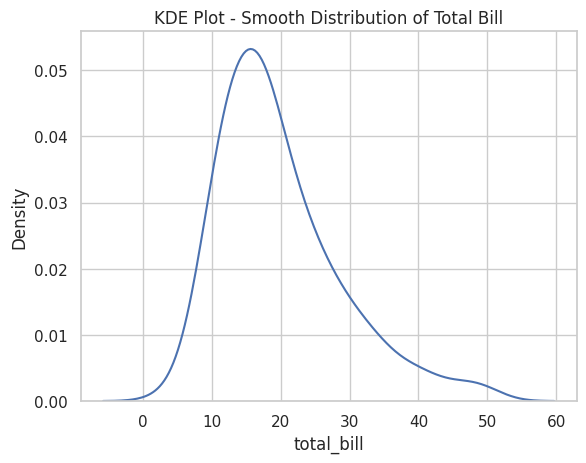

In [ ]:
# KDE Plot
sns.kdeplot(tips['total_bill'])
plt.title('KDE Plot - Smooth Distribution of Total Bill')
plt.show()

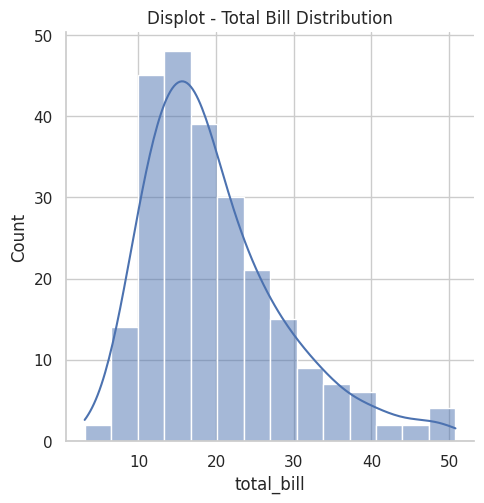

In [ ]:
# Displot (Histogram + KDE)
sns.displot(tips['total_bill'], kde=True)
plt.title('Displot - Total Bill Distribution')
plt.show()

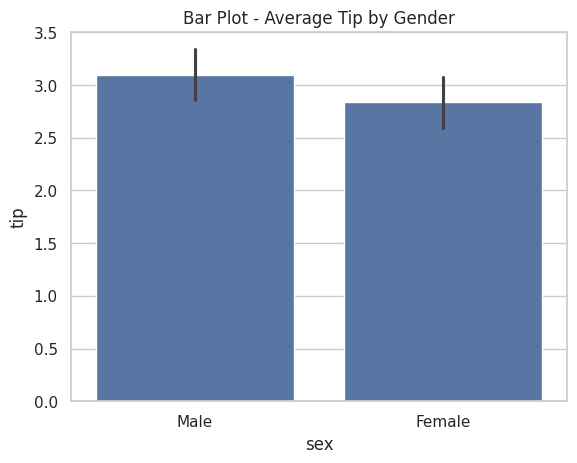

In [ ]:
import seaborn as sns

# Bar Plot - Average Tip by Gender
sns.barplot(x='sex', y='tip', data=tips)
plt.title('Bar Plot - Average Tip by Gender')
plt.show()


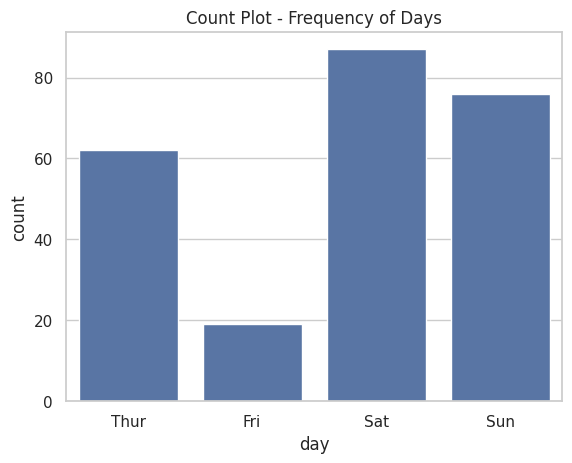

In [ ]:
# Count Plot - Frequency of Days
sns.countplot(x='day', data=tips)
plt.title('Count Plot - Frequency of Days')
plt.show()

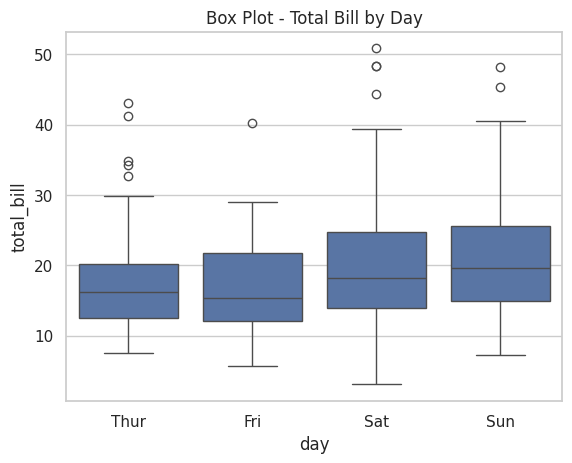

In [ ]:
# Box Plot - Total Bill by Day
sns.boxplot(x='day', y='total_bill', data=tips)
plt.title('Box Plot - Total Bill by Day')
plt.show()

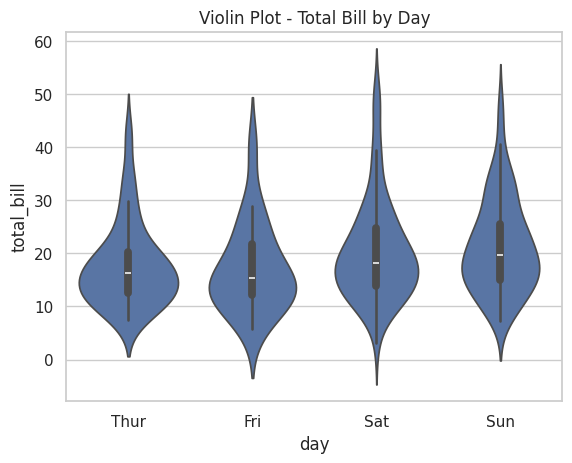

In [ ]:
# Violin Plot - Distribution + Summary
sns.violinplot(x='day', y='total_bill', data=tips)
plt.title('Violin Plot - Total Bill by Day')
plt.show()

#4. Relationship Plots (Why: see how two numeric variables relate)
1. Scatterplot (sns.scatterplot): point cloud to inspect correlation.
2. Lineplot (sns.lineplot): trends over an ordered variable.
3. Relplot (sns.relplot): figure-level interface for relational plots; supports faceting.

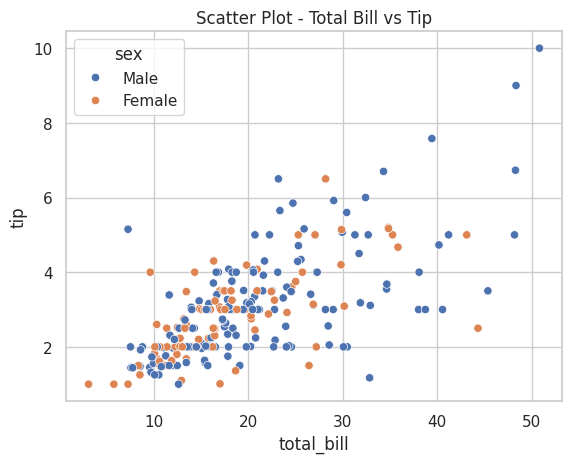

In [ ]:
# Scatter Plot - Total Bill vs Tip
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex')
plt.title('Scatter Plot - Total Bill vs Tip')
plt.show()

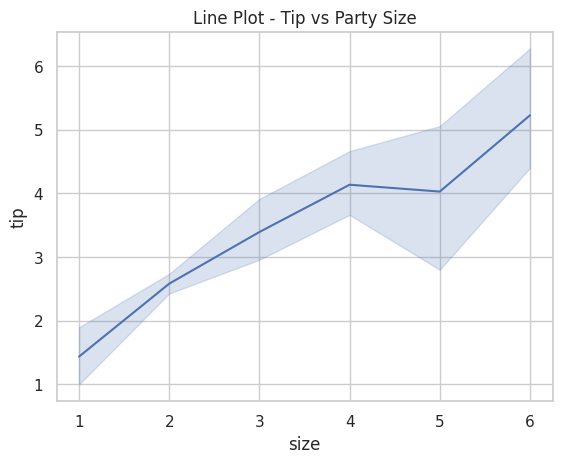

In [ ]:
# Line Plot - Tip vs Party Size (useful for trend-like visuals)
sns.lineplot(x='size', y='tip', data=tips)
plt.title('Line Plot - Tip vs Party Size')
plt.show()

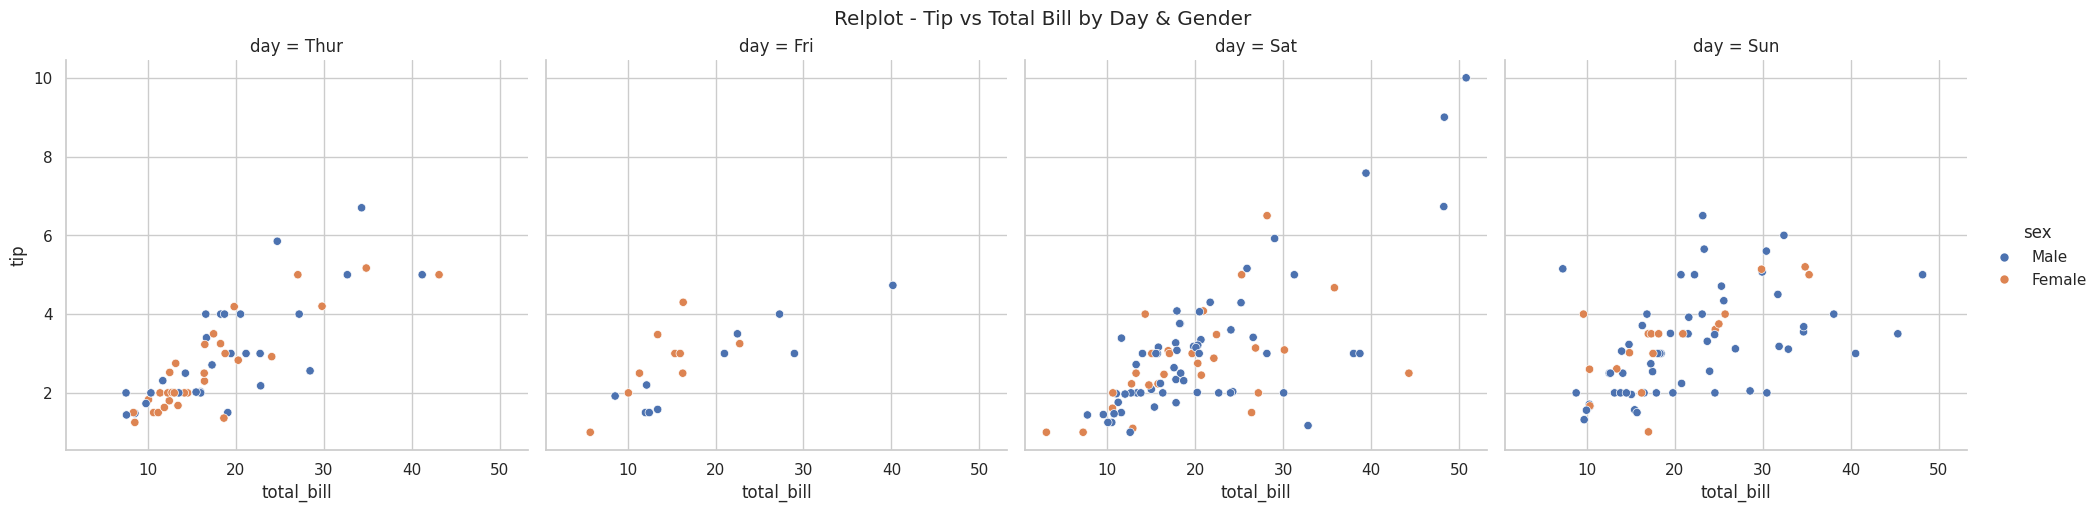

In [ ]:
# Relplot with Facets
sns.relplot(x='total_bill', y='tip', hue='sex', col='day', data=tips)
plt.suptitle('Relplot - Tip vs Total Bill by Day & Gender', y=1.02)
plt.show()

#Matrix & Correlation Plots (Why: inspect relationships between many variables)
1. Heatmap (sns.heatmap): visualize correlation matrix or any 2D numerical table.
2. Clustermap (sns.clustermap): heatmap + hierarchical clustering to find groups.#

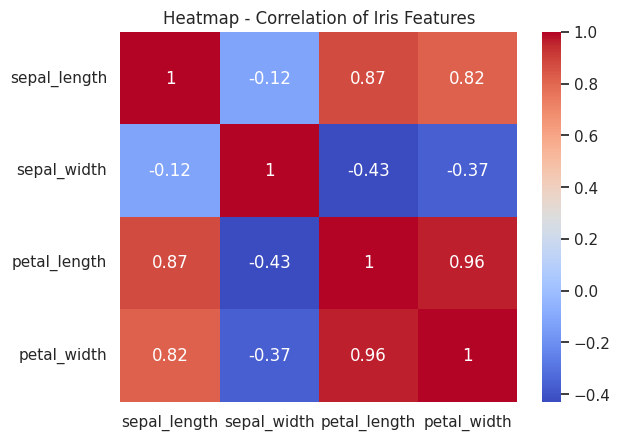

In [ ]:
# Select only numeric columns
iris_num = iris.select_dtypes(include=['float', 'int'])

# Compute correlation
corr = iris_num.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True,cmap='coolwarm')
plt.title("Heatmap - Correlation of Iris Features")
plt.show()

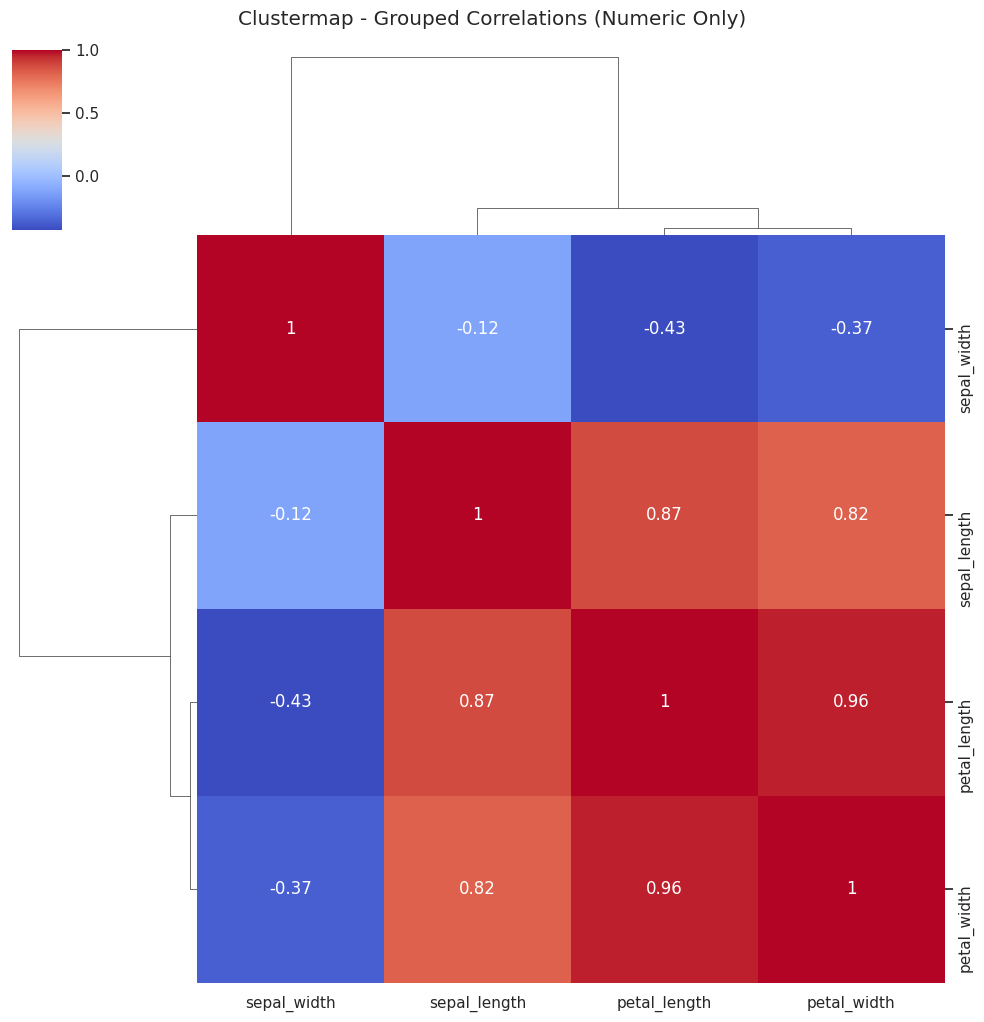

In [ ]:
# Select only numeric columns (exclude 'species')
iris_num = iris.select_dtypes(include=['float', 'int'])

# Compute correlation matrix
corr = iris_num.corr()

# Create the clustermap
sns.clustermap(corr, cmap='coolwarm', annot=True)
plt.suptitle('Clustermap - Grouped Correlations (Numeric Only)', y=1.02)
plt.show()

#Task 3
Visualization Task (seaborn Matplotlib)




#1.  

A. Numerical Columns (Item_price, connected_handling_time, CSAT Score)

“Show me the distribution of Item_price.” → Histogram

“How does CSAT Score vary overall?” → Boxplot

“What is the spread of connected_handling_time values?” → Histogram + boxplot

“Can I see a pie chart of CSAT scores by their value?” → Pie chart

“What are the most common price ranges for items?” → Binned bar chart

B. Categorical Columns (channel_name, category, Sub-category, Agent Shift, Tenure Bucket)

 6. “How many tickets come from each channel_name?” → Bar chart

 7. “Which category has the highest number of tickets?” → Bar chart (sorted)

 8. “Show me the distribution of tickets by Agent Shift.” → Pie chart

 9. “What are the top 10 Sub-category values?” → Horizontal bar chart

 10. “How many tickets belong to each Tenure Bucket?” → Bar chart

#2.

A. Numerical vs Numerical

 11. “Is there a relationship between Item_price and CSAT Score?” → Scatter plot

 12. “How does connected_handling_time affect CSAT Score?” → Scatter plot + trend line

 13. “Show me density or clusters of Item_price vs connected_handling_time.” → Hexbin plot

B. Numerical vs Categorical

 14. “What is the average CSAT Score per channel_name?” → Grouped bar chart

 15. “Show distribution of Item_price per category.” → Multiple boxplots

 16. “How does connected_handling_time vary by Agent Shift?” → Boxplot

 17. “Show mean and variability of Item_price across top 5 Product_category.” → Error bar plot

 18. “How do CSAT scores differ across Tenure Bucket?” → Bar chart

C. Categorical vs Categorical

 19. “Show the number of tickets by channel_name and category together.” → Stacked bar chart

 20. “How does Agent Shift distribution differ across category?” → Stacked bar or grouped bar chart



#3.  

(Using order_date_time, Issue_reported at, Survey_response_Date)

“How many tickets were created per day?” → Line plot

“Show daily trend of average CSAT Score.” → Line plot (rolling average optional)

“Plot number of issues reported weekly.” → Bar chart (aggregated)

“What is the monthly pattern of ticket volume?” → Line plot with month aggregation

“How does ticket volume differ by channel_name over time?” → Multi-line plot

“Show the time lag between Issue_reported at and issue_responded.” → Line or scatter plot (response time trend)

“Show the volume of resolved issues over time.” → Line plot

“What is the peak hour or day for incoming tickets?” → Bar chart (hourly/daily distribution)





In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')
import pandas as pd

path = '/content/drive/My Drive/Customer_support_data.csv'
dp = pd.read_csv(path, encoding='latin-1')
print(dp.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                              Unique id channel_name         category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   

                   Sub-category Customer Remarks  \
0                Life Insurance              NaN   
1  Product Specific Information              NaN   
2             Installation/demo              NaN   
3        Reverse Pickup Enquiry              NaN   
4                    Not Needed              NaN   

                               Order_id order_date_time Issue_reported at  \
0  c27c9bb4-fa36-4140-9f1f-21009254ffdb   

In [ ]:
print(dp.columns)

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')


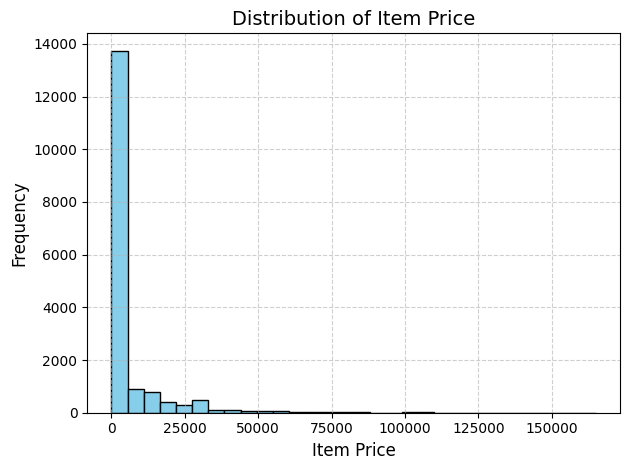

In [ ]:

# 1 “Show me the distribution of Item_price.” → Histogram
plt.hist(dp['Item_price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Item Price', fontsize=14)
plt.xlabel('Item Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

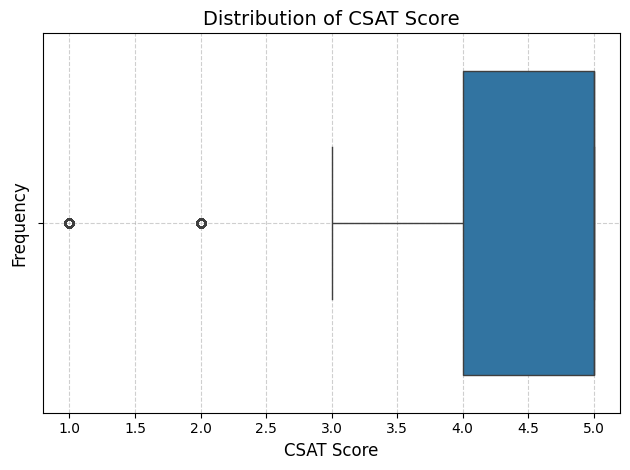

In [ ]:
# 2. “How does CSAT Score vary overall?” → Boxplot
sns.boxplot(x=dp['CSAT Score'])
plt.title('Distribution of CSAT Score', fontsize=14)
plt.xlabel('CSAT Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

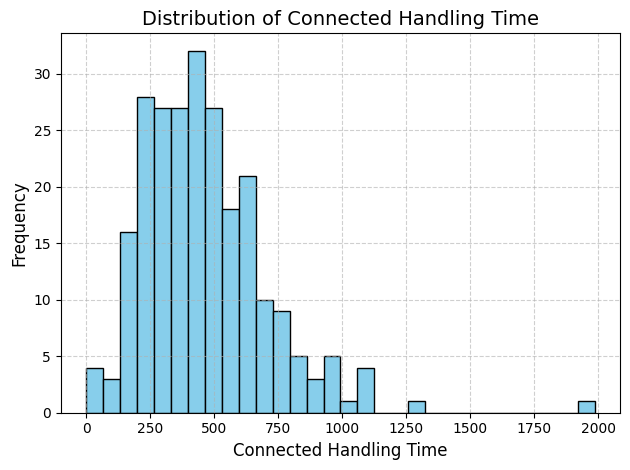

In [ ]:
# 3. “What is the spread of connected_handling_time values?” → Histogram + boxplot
plt.hist(dp['connected_handling_time'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Connected Handling Time', fontsize=14)
plt.xlabel('Connected Handling Time', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

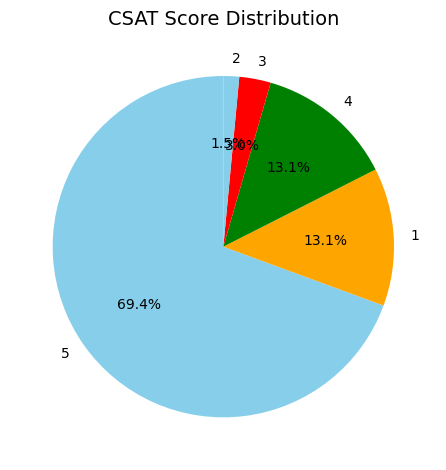

In [ ]:
# 4. “Can I see a pie chart of CSAT scores by their value?” → Pie chart
category_counts = dp['CSAT Score'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue','orange','green','red'])
plt.title('CSAT Score Distribution', fontsize=14)
plt.tight_layout()
plt.show()


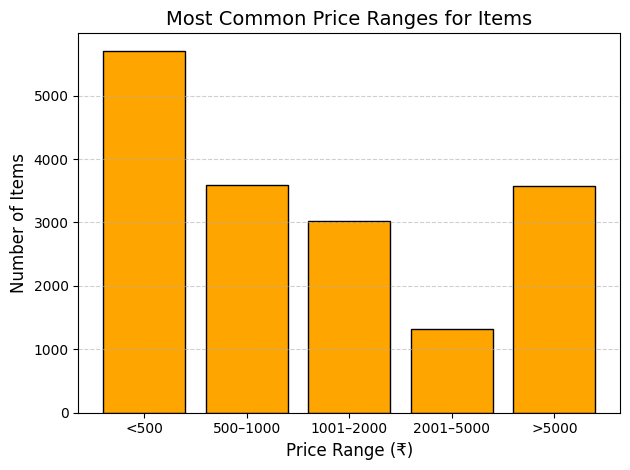

In [ ]:
# 5. “What are the most common price ranges for items?” → Binned bar chart

bins = [0, 500, 1000, 2000, 5000, dp['Item_price'].max()+1]
labels = ['<500', '500–1000', '1001–2000', '2001–5000', '>5000']

dp['Price_Range'] = pd.cut(dp['Item_price'], bins=bins, labels=labels, include_lowest=True)

price_counts = dp['Price_Range'].value_counts().sort_index()

plt.bar(price_counts.index, price_counts.values, color='orange', edgecolor='black')
plt.title('Most Common Price Ranges for Items', fontsize=14)
plt.xlabel('Price Range (₹)', fontsize=12)
plt.ylabel('Number of Items', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


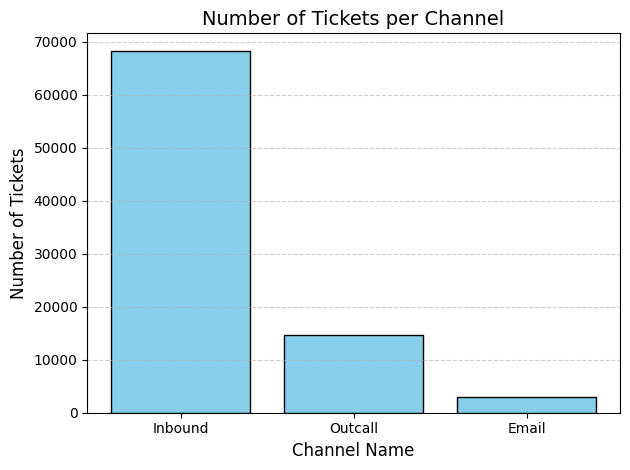

In [ ]:
# B. Categorical Columns (channel_name, category, Sub-category, Agent Shift, Tenure Bucket)

# 6. “How many tickets come from each channel_name?” → Bar chart
channel_counts = dp['channel_name'].value_counts()
plt.bar(channel_counts.index, channel_counts.values, color='skyblue', edgecolor='black')
plt.title('Number of Tickets per Channel', fontsize=14)
plt.xlabel('Channel Name', fontsize=12)
plt.ylabel('Number of Tickets', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

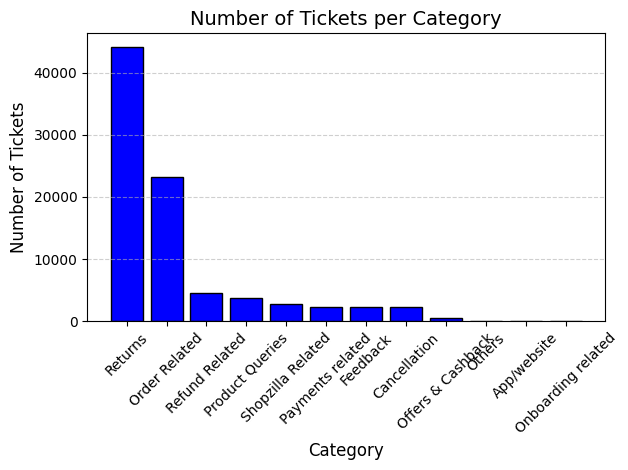

In [ ]:
#  7. “Which category has the highest number of tickets?” → Bar chart (sorted)
category_counts = dp['category'].value_counts()
plt.bar(category_counts.index, category_counts.values, color='blue', edgecolor='black')
plt.title('Number of Tickets per Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Tickets', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

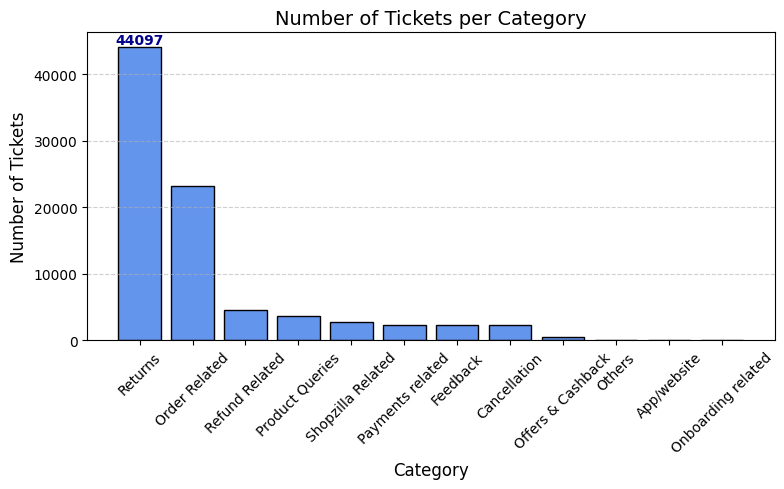

In [ ]:

# 7. Which category has the highest number of tickets? → Sorted Bar Chart
category_counts = dp['category'].value_counts()
plt.figure(figsize=(8,5))
plt.bar(category_counts.index, category_counts.values, color='cornflowerblue', edgecolor='black')
plt.title('Number of Tickets per Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Tickets', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
top_category = category_counts.idxmax()
top_value = category_counts.max()
plt.text(top_category, top_value, f'{top_value}', ha='center', va='bottom',
         fontsize=10, fontweight='bold', color='darkblue')
plt.tight_layout()
plt.show()

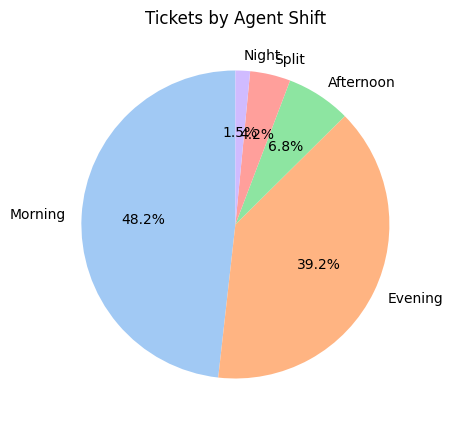

In [ ]:
# 8. “Show me the distribution of tickets by Agent Shift.” → Pie chart
shift_counts = dp['Agent Shift'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(
    shift_counts,
    labels=shift_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")
)
plt.title('Tickets by Agent Shift')
plt.show()


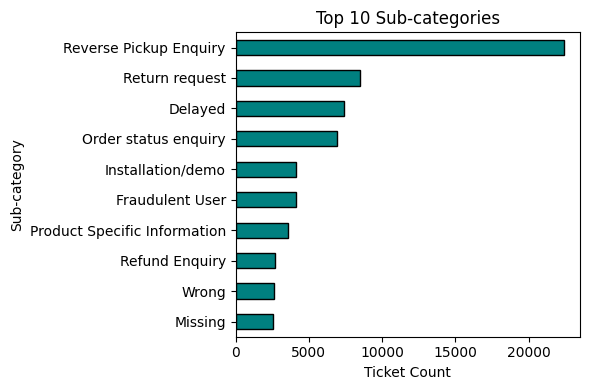

In [ ]:
# 9. “What are the top 10 Sub-category values?” → Horizontal bar chart
top10_subcats = dp['Sub-category'].value_counts().head(10)
plt.figure(figsize=(6,4))
top10_subcats.plot(kind='barh', color='teal', edgecolor='black')
plt.title('Top 10 Sub-categories')
plt.xlabel('Ticket Count')
plt.ylabel('Sub-category')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

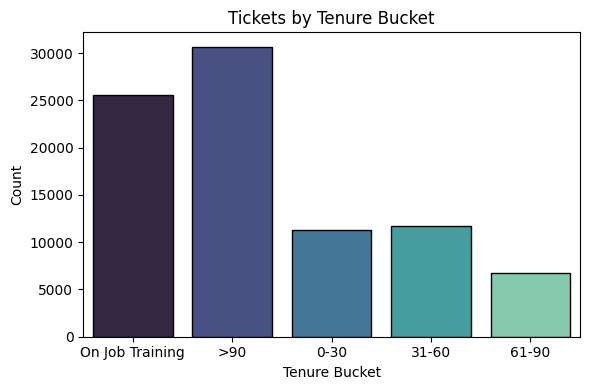

In [ ]:
# 10. Tickets per Tenure Bucket — Bar chart

plt.figure(figsize=(6,4))
sns.countplot(x='Tenure Bucket', hue='Tenure Bucket', data=dp, palette='mako', edgecolor='black', legend=False)
plt.title('Tickets by Tenure Bucket')
plt.xlabel('Tenure Bucket')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


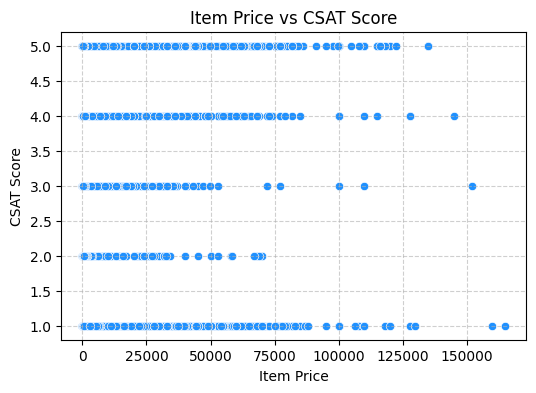

In [ ]:
# 11. Relationship between Item_price and CSAT Score — Scatter plot

plt.figure(figsize=(6,4))
sns.scatterplot(x='Item_price', y='CSAT Score', data=dp, color='dodgerblue')
plt.title('Item Price vs CSAT Score')
plt.xlabel('Item Price')
plt.ylabel('CSAT Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

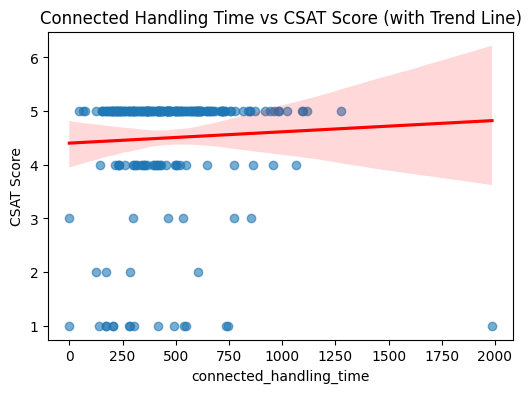

In [ ]:
# 12. How connected_handling_time affects CSAT Score — Scatter + trend line

plt.figure(figsize=(6,4))
sns.regplot(x='connected_handling_time', y='CSAT Score', data=dp, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Connected Handling Time vs CSAT Score (with Trend Line)')
plt.show()

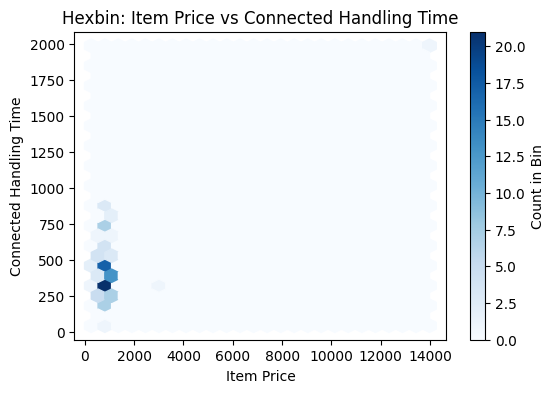

In [ ]:
# 13. Density of Item_price vs connected_handling_time — Hexbin plot

plt.figure(figsize=(6,4))
plt.hexbin(dp['Item_price'], dp['connected_handling_time'], gridsize=25, cmap='Blues')
plt.colorbar(label='Count in Bin')
plt.title('Hexbin: Item Price vs Connected Handling Time')
plt.xlabel('Item Price')
plt.ylabel('Connected Handling Time')
plt.show()

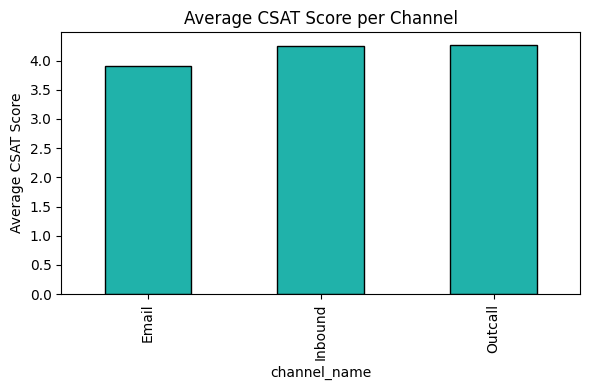

In [ ]:
# 14. Average CSAT Score per channel_name — Grouped bar chart

plt.figure(figsize=(6,4))
avg_csat = dp.groupby('channel_name')['CSAT Score'].mean().sort_values()
avg_csat.plot(kind='bar', color='lightseagreen', edgecolor='black')
plt.title('Average CSAT Score per Channel')
plt.ylabel('Average CSAT Score')
plt.tight_layout()
plt.show()

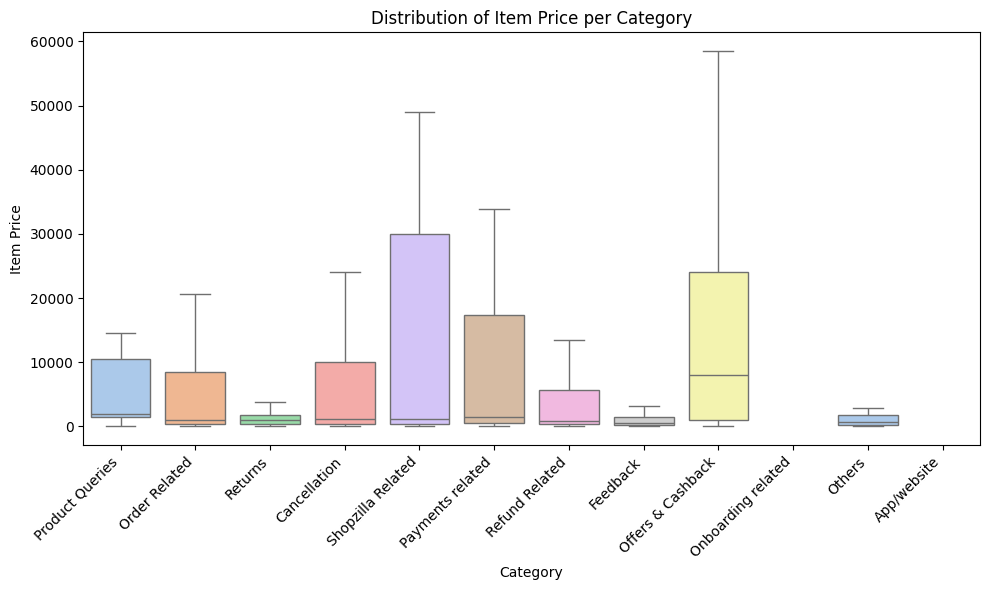

In [ ]:
# 15. Distribution of Item_price per category — Multiple boxplots

plt.figure(figsize=(10,6))
sns.boxplot(
    x='category',
    y='Item_price',
    data=dp,
    hue='category',
    palette='pastel',
    legend=False,
    showfliers=False
)
plt.title('Distribution of Item Price per Category')
plt.xlabel('Category')
plt.ylabel('Item Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



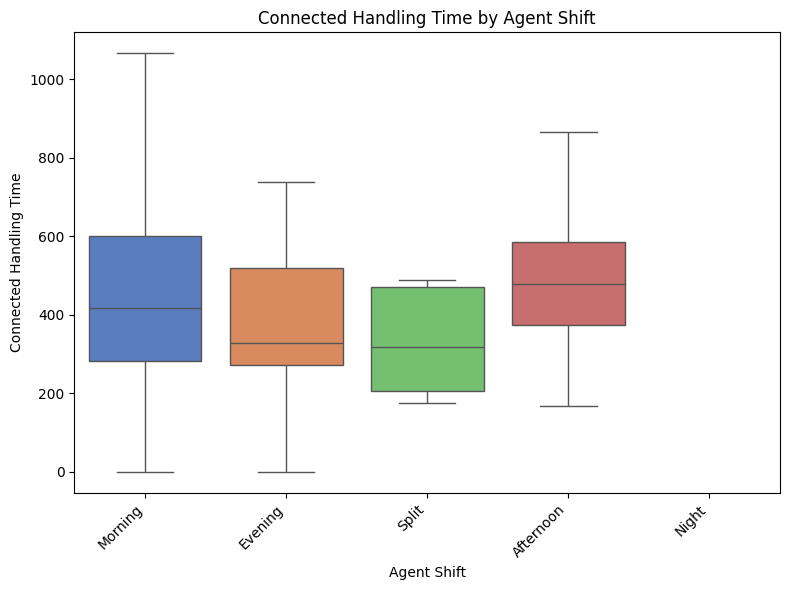

In [ ]:
# 16. Connected_handling_time vary by Agent Shift — Boxplot

plt.figure(figsize=(8,6))
sns.boxplot(
    x='Agent Shift',
    y='connected_handling_time',
    data=dp,
    hue='Agent Shift',      # Assign hue same as x for coloring
    palette='muted',
    legend=False,
    showfliers=False         # optional: hides outliers for clarity
)
plt.title('Connected Handling Time by Agent Shift')
plt.xlabel('Agent Shift')
plt.ylabel('Connected Handling Time')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


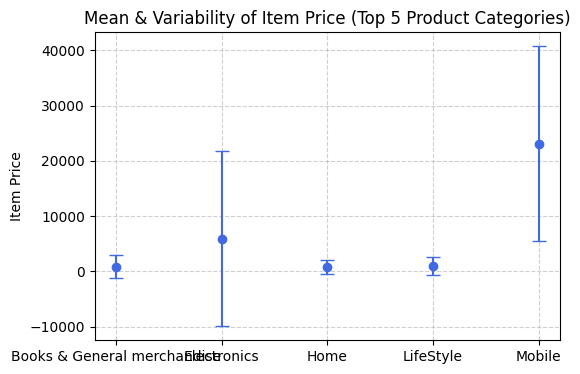

In [ ]:
# 17. Mean and variability of Item_price across top 5 Product_category — Error bar plot

top5_cats = dp['Product_category'].value_counts().head(5).index
summary = dp[dp['Product_category'].isin(top5_cats)].groupby('Product_category')['Item_price'].agg(['mean', 'std'])
plt.figure(figsize=(6,4))
plt.errorbar(summary.index, summary['mean'], yerr=summary['std'], fmt='o', capsize=5, color='royalblue')
plt.title('Mean & Variability of Item Price (Top 5 Product Categories)')
plt.ylabel('Item Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

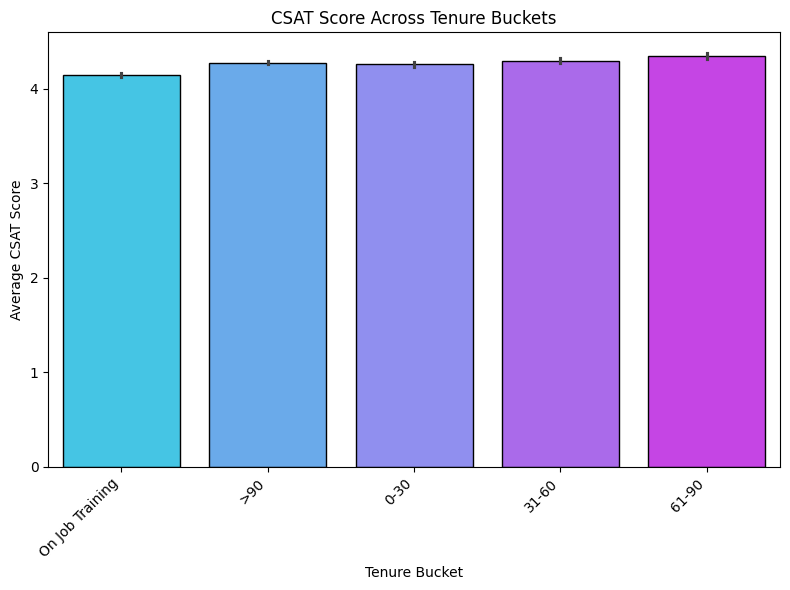

In [ ]:
# 18. How CSAT scores differ across Tenure Bucket — Bar chart

plt.figure(figsize=(8,6))
sns.barplot(
    x='Tenure Bucket',
    y='CSAT Score',
    data=dp,
    hue='Tenure Bucket',
    palette='cool',
    legend=False,
    edgecolor='black'
)
plt.title('CSAT Score Across Tenure Buckets')
plt.xlabel('Tenure Bucket')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


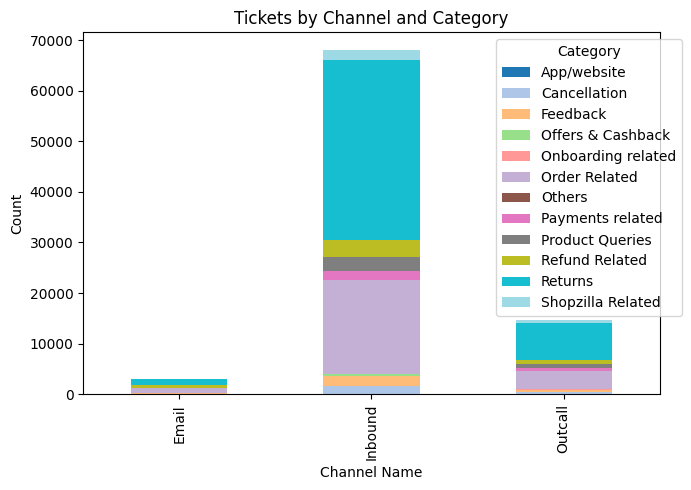

In [ ]:
# 19. Tickets by channel_name and category — Stacked bar chart

cross_tab = pd.crosstab(dp['channel_name'], dp['category'])
cross_tab.plot(kind='bar', stacked=True, figsize=(7,5), colormap='tab20')
plt.title('Tickets by Channel and Category')
plt.xlabel('Channel Name')
plt.ylabel('Count')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

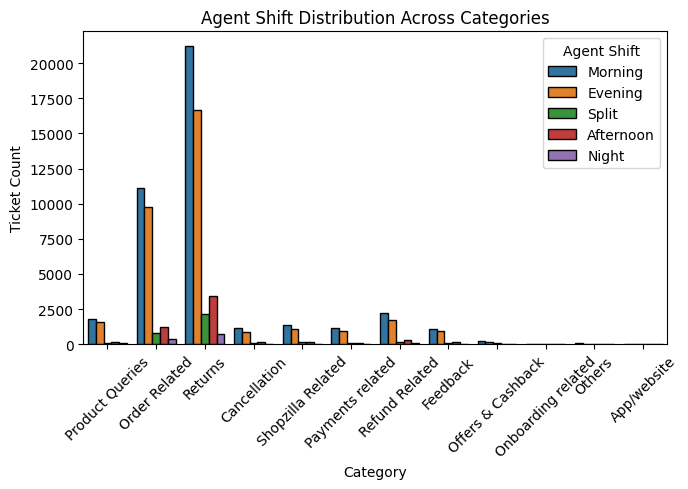

In [ ]:
# 20. Agent Shift distribution across category — Grouped bar chart

plt.figure(figsize=(7,5))
sns.countplot(x='category', hue='Agent Shift', data=dp, palette='tab10', edgecolor='black')
plt.title('Agent Shift Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Ticket Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#3

In [ ]:
# Properly parse date columns (day comes first in your data)

dp['order_date_time'] = pd.to_datetime(dp['order_date_time'], errors='coerce', dayfirst=True, format='%d/%m/%Y %H:%M')
dp['Issue_reported at'] = pd.to_datetime(dp['Issue_reported at'], errors='coerce', dayfirst=True, format='%d/%m/%Y %H:%M')
dp['Survey_response_Date'] = pd.to_datetime(dp['Survey_response_Date'], errors='coerce', dayfirst=True, format='%d/%m/%Y %H:%M')


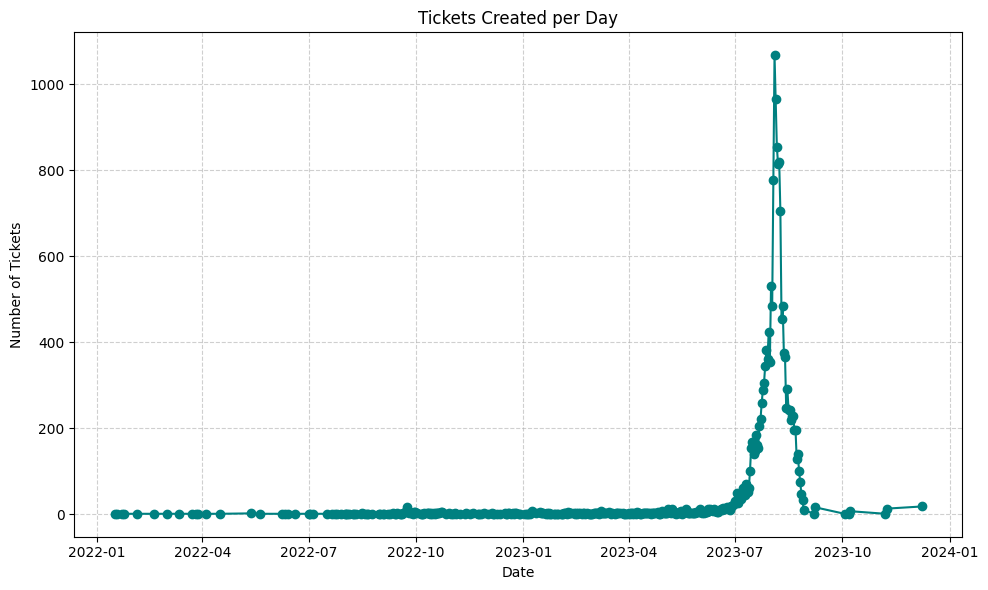

In [ ]:
# “How many tickets were created per day?” → Line plot

daily_tickets = dp.groupby(dp['order_date_time'].dt.date).size()

plt.figure(figsize=(10,6))
plt.plot(daily_tickets.index, daily_tickets.values, marker='o', color='teal')
plt.title('Tickets Created per Day')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


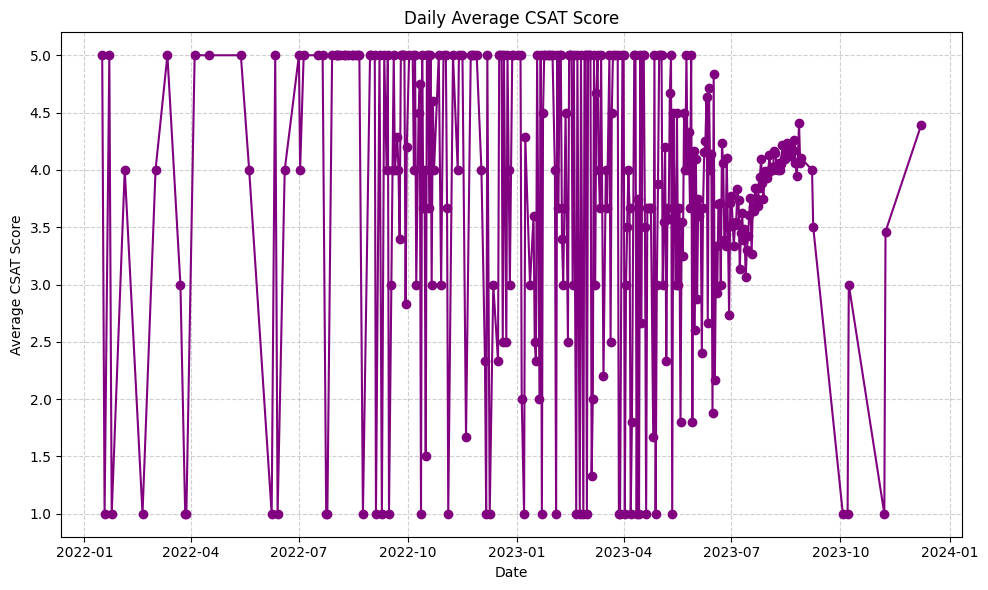

In [ ]:
# “Show daily trend of average CSAT Score.” → Line plot

daily_csat = dp.groupby(dp['order_date_time'].dt.date)['CSAT Score'].mean()

plt.figure(figsize=(10,6))
plt.plot(daily_csat.index, daily_csat.values, color='purple', marker='o')
plt.title('Daily Average CSAT Score')
plt.xlabel('Date')
plt.ylabel('Average CSAT Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


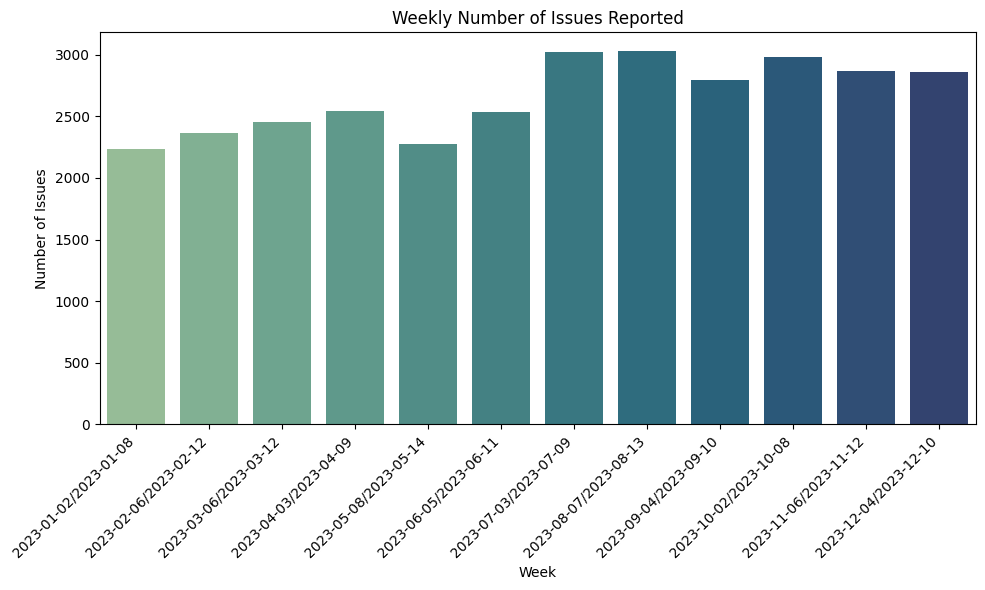

In [ ]:
# 3. “Plot number of issues reported weekly.” → Bar chart

weekly_issues = dp.groupby(dp['Issue_reported at'].dt.to_period('W')).size()

plt.figure(figsize=(10,6))
sns.barplot(
    x=weekly_issues.index.astype(str),
    y=weekly_issues.values,
    hue=weekly_issues.index.astype(str),
    palette='crest',
    legend=False
)
plt.title('Weekly Number of Issues Reported')
plt.xlabel('Week')
plt.ylabel('Number of Issues')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


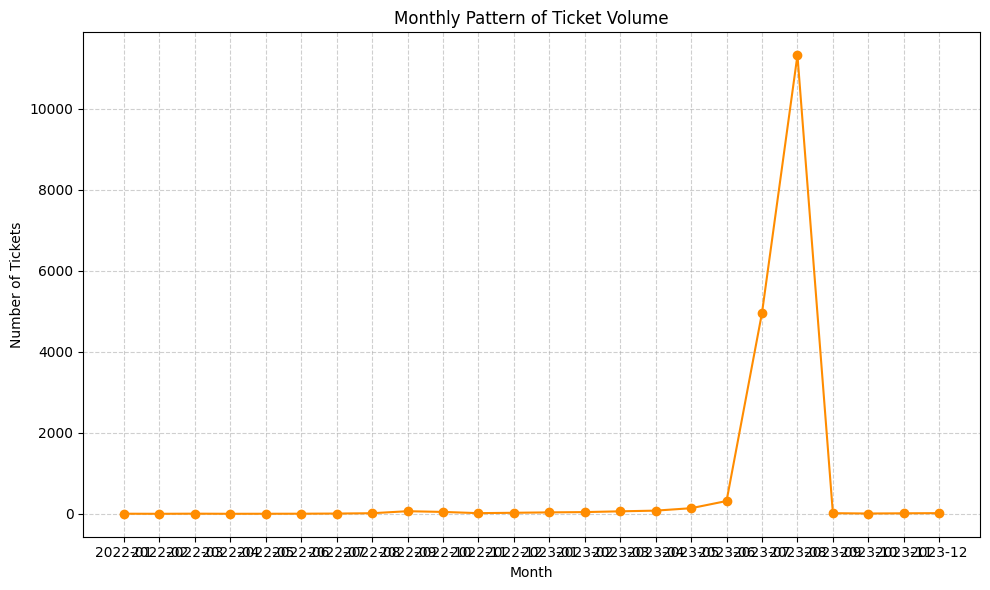

In [ ]:
# 4. “What is the monthly pattern of ticket volume?” → Line plot

monthly_tickets = dp.groupby(dp['order_date_time'].dt.to_period('M')).size()

plt.figure(figsize=(10,6))
plt.plot(monthly_tickets.index.astype(str), monthly_tickets.values, color='darkorange', marker='o')
plt.title('Monthly Pattern of Ticket Volume')
plt.xlabel('Month')
plt.ylabel('Number of Tickets')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


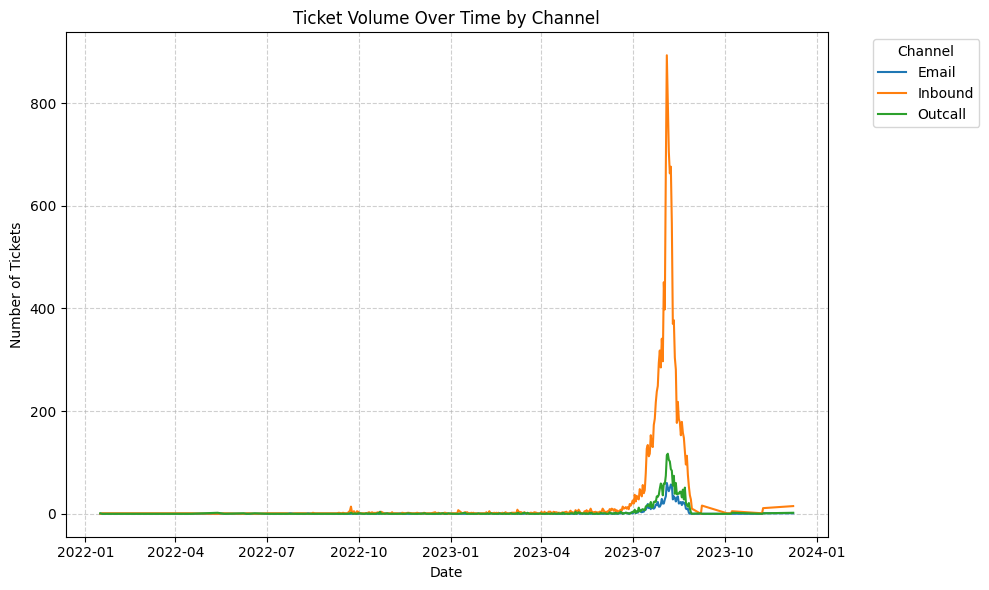

In [ ]:
# 5. “How does ticket volume differ by channel_name over time?” → Multi-line plot

channel_trends = dp.groupby([dp['order_date_time'].dt.date, 'channel_name']).size().unstack(fill_value=0)

plt.figure(figsize=(10,6))
for col in channel_trends.columns:
    plt.plot(channel_trends.index, channel_trends[col], label=col)

plt.title('Ticket Volume Over Time by Channel')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


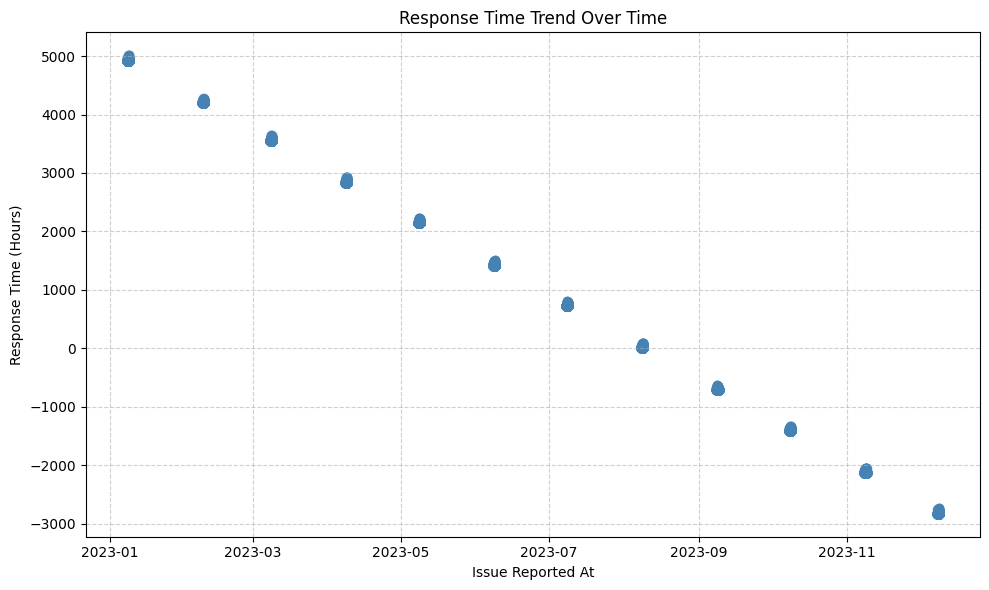

In [ ]:
# 6. “Show the time lag between Issue_reported at and issue_responded.” → Scatter plot

dp['response_time'] = (pd.to_datetime(dp['issue_responded'], format='%d/%m/%Y %H:%M', errors='coerce') - dp['Issue_reported at']).dt.total_seconds() / 3600

plt.figure(figsize=(10,6))
plt.scatter(dp['Issue_reported at'], dp['response_time'], alpha=0.6, color='steelblue')
plt.title('Response Time Trend Over Time')
plt.xlabel('Issue Reported At')
plt.ylabel('Response Time (Hours)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

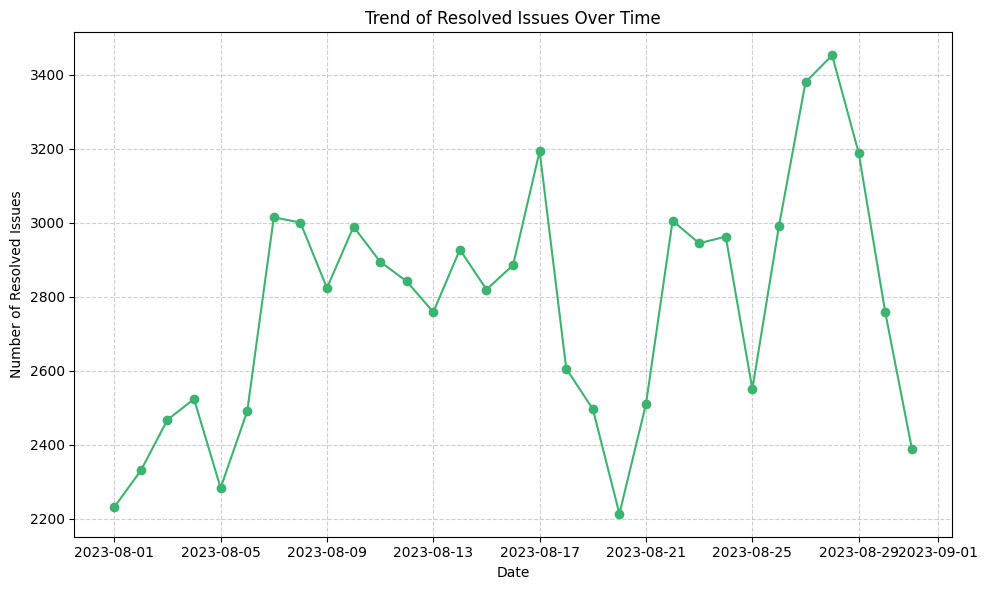

In [ ]:
# 7. “Show the volume of resolved issues over time.” → Line plot

# Convert 'issue_responded' to datetime safely with dayfirst=True
dp['issue_responded'] = pd.to_datetime(dp['issue_responded'], errors='coerce', dayfirst=True, format='%d/%m/%Y %H:%M')

# Group by date and count resolved issues per day
resolved_trend = dp.groupby(dp['issue_responded'].dt.date).size()

# Plot the trend
plt.figure(figsize=(10, 6))
resolved_trend.plot(kind='line', color='mediumseagreen', marker='o')
plt.title('Trend of Resolved Issues Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Resolved Issues')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



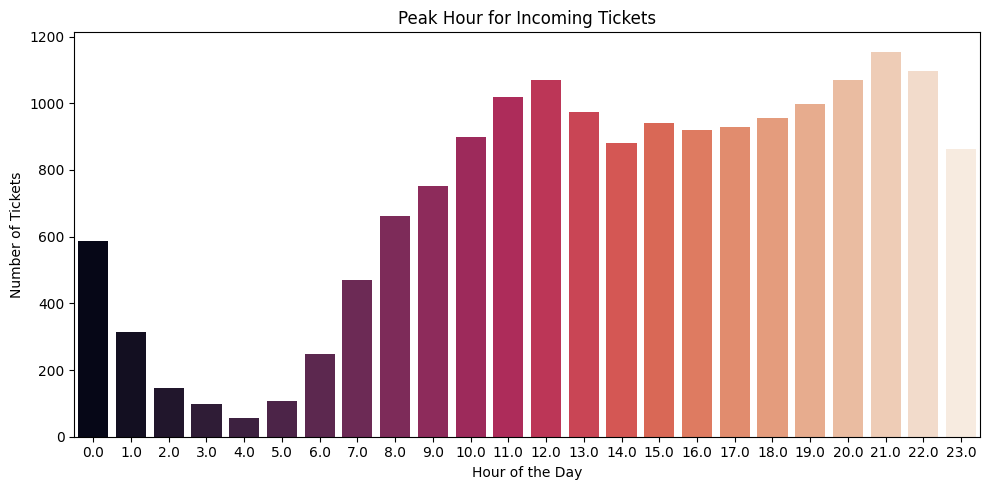

In [ ]:
#8. “What is the peak hour or day for incoming tickets?” → Bar chart

dp['hour'] = dp['order_date_time'].dt.hour
hourly_tickets = dp['hour'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(
    x=hourly_tickets.index,
    y=hourly_tickets.values,
    hue=hourly_tickets.index,
    palette='rocket',
    legend=False
)
plt.title('Peak Hour for Incoming Tickets')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tickets')
plt.tight_layout()
plt.show()
